In [2]:
import matplotlib.pyplot as plt
import os

In [3]:
root_dir_rmse = 'D:\\Luis_Mercado\\Google Business\\Shared Folder\\Thesis 1\\Experiment Results\\rmse'
root_dir_plcc = 'D:\\Luis_Mercado\\Google Business\\Shared Folder\\Thesis 1\\Experiment Results\\plcc'

models = ['direct_v4', 'recurrent_singleton_v2', 'nbr_singleton_v2', 'randomforest_singleton_v2',
          'sgb_singleton_v2', 'ensemble_singleton_v2']
model_names = ['Direct SVR', 'Recurrent SVR', 'K-Nearest Neighbors Regression', 'Random Forest Regression', 
                'Stochastic Gradient Boosting', 'Stacking Ensemble']

plcc_files = ['plcc_{}.txt'.format(model) for model in models]
rmse_files = ['rmse_{}.txt'.format(model) for model in models]

plcc_dict = {}
rmse_dict = {}

for idx, plcc_file in enumerate(plcc_files):
    model_name = model_names[idx]
    file_path = os.path.join(root_dir_plcc, plcc_file)
    with open(file_path, mode='r', encoding='utf-8') as reader:
        current_apc = ''
        for line_read in reader:
            if 'PLCC for' in line_read:
                current_apc = line_read[:-1]
                if current_apc not in plcc_dict:
                    plcc_dict[current_apc] = {}
                if model_name not in plcc_dict[current_apc]:
                    plcc_dict[current_apc][model_name] = []
            else:
                time_step, plcc_point = line_read.split(':')
                time_step = int(time_step[8:-1])
                plcc_point = float(plcc_point.split(',')[0].strip()[1:])
                point = (time_step, plcc_point)
                plcc_dict[current_apc][model_name].append(point)
                
for idx, rmse_file in enumerate(rmse_files):
    model_name = model_names[idx]
    file_path = os.path.join(root_dir_rmse, rmse_file)
    with open(file_path, mode='r', encoding='utf-8') as reader:
        current_apc = ''
        for line_read in reader:
            if 'RMSE for' in line_read:
                current_apc = line_read[:-1]
                if current_apc not in rmse_dict:
                    rmse_dict[current_apc] = {}
                if model_name not in rmse_dict[current_apc]:
                    rmse_dict[current_apc][model_name] = []
            else:
                time_step, rmse_point = line_read.split(':')
                time_step = int(time_step[8:-1])
                rmse_point = float(rmse_point.split(',')[0].strip())
                point = (time_step, rmse_point)
                rmse_dict[current_apc][model_name].append(point)

In [4]:
root_dir_actualversus = \
    'D:\\Luis_Mercado\\Google Business\\Shared Folder\\Thesis 1\\Experiment Results\\actual vs predicted\\recurrent vs ensemble'
apc_list = os.listdir(root_dir_actualversus)
apc_list.remove('desktop.ini')

actual_values = {}
rsvr_preds = {}
ens_preds = {}

for apc in apc_list:
    apc_dir = os.path.join(root_dir_actualversus, apc)
    print('opening directory for %s' % apc)
    actual_values[apc] = {}
    rsvr_preds[apc] = {}
    ens_preds[apc] = {}
    with os.scandir(apc_dir) as entries:
        for entry in entries:
            if entry.is_file() and entry.name != 'desktop.ini':
                time_step = entry.name.split('ensemble_')[1].split('.')[0].strip()
                file_path = os.path.join(apc_dir, entry.name)
                actual_values[apc][time_step] = list()
                ens_preds[apc][time_step] = list()
                rsvr_preds[apc][time_step] = list()
                with open(file_path, 'r') as f_reader:
                    read_line = f_reader.readline()
                    while read_line:
                        values = read_line.split(',')
                        read_line = f_reader.readline()
                        actual_values[apc][time_step].append(float(values[0]))
                        rsvr_preds[apc][time_step].append(float(values[1]))
                        ens_preds[apc][time_step].append(float(values[2]))
    print('done with %s' % apc)

opening directory for CO
done with CO
opening directory for NO2
done with NO2
opening directory for O3
done with O3
opening directory for PM25
done with PM25


# Recurrent vs Ensemble based on actual vs predicted values

In [5]:
import numpy as np
def plot_actualversus(apc_name, time_step):
    plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
    plt.title('Recurrent vs Ensemble for {} at {}'.format(apc_name, time_step))
    plt.xlabel('Data Point #')
    plt.ylabel('Value')
    x_points = np.arange(0, len(actual_values[apc_name][time_step]))
    y_points_actual = actual_values[apc_name][time_step]
    y_points_rsvr = rsvr_preds[apc_name][time_step]
    y_points_ens = ens_preds[apc_name][time_step]
    
    plt.plot(x_points, y_points_actual, 'o', linewidth=2, label='Actual', ms=10)
    plt.plot(x_points, y_points_rsvr, '+', linewidth=2, label='RSVR Predicted', ms=10)
    plt.plot(x_points, y_points_ens, 'x', linewidth=2, label='Ensemble Predicted', ms=10)
    plt.legend(loc='upper right')

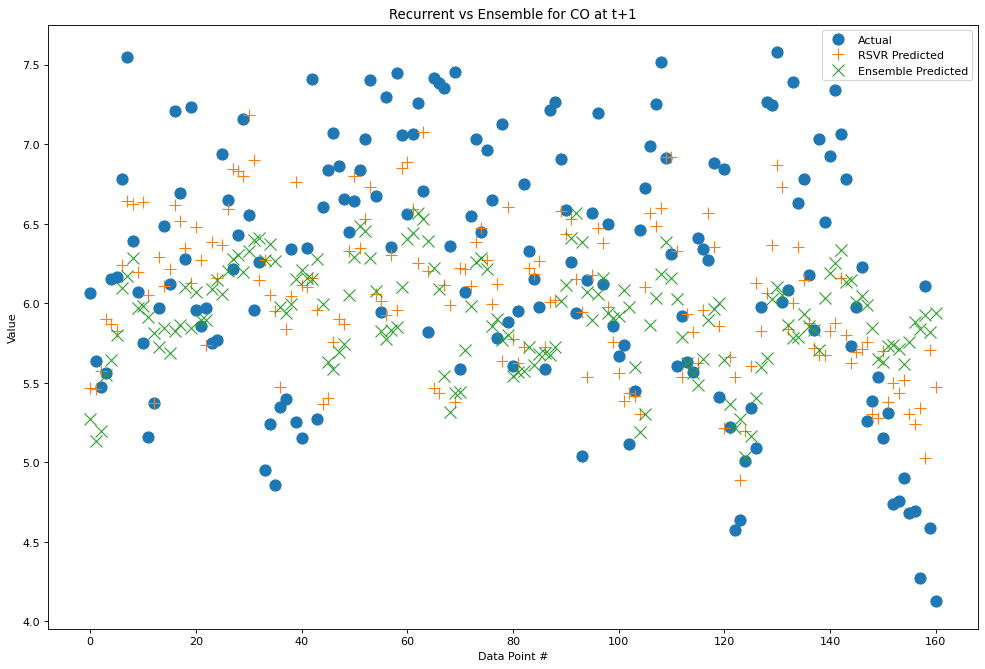

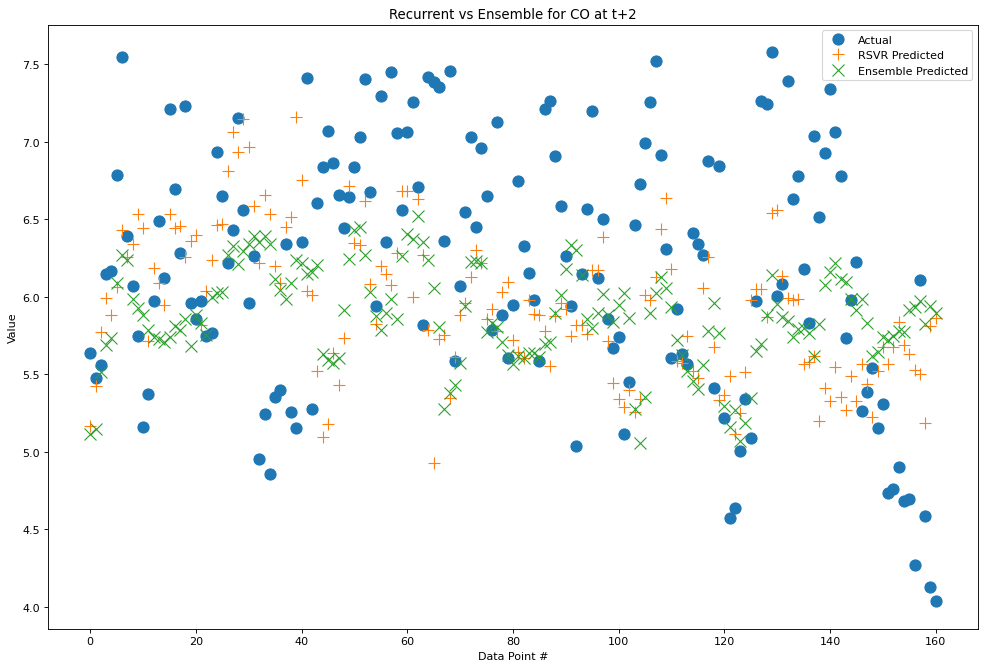

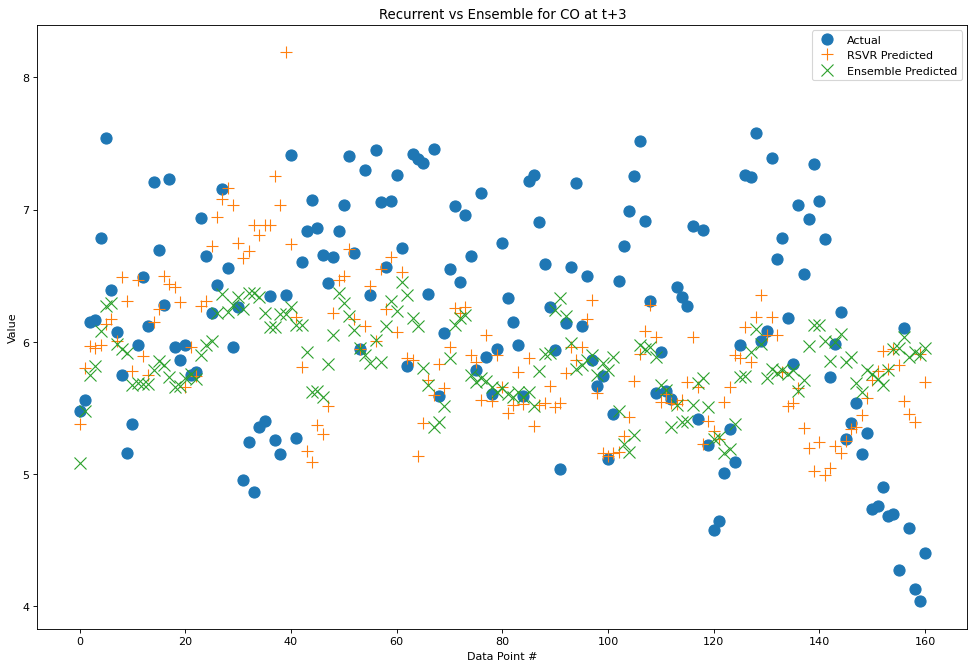

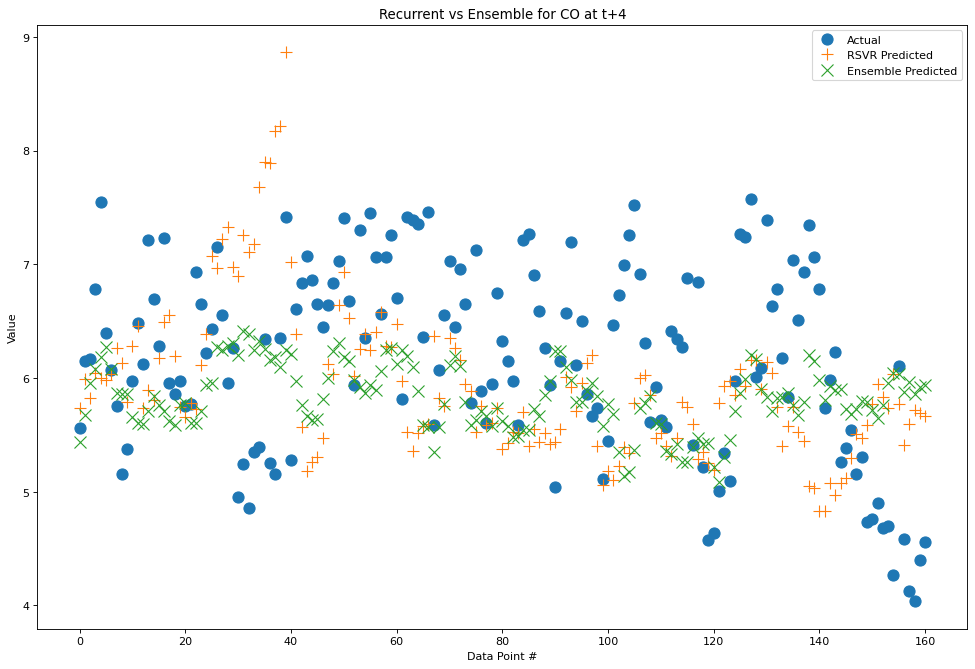

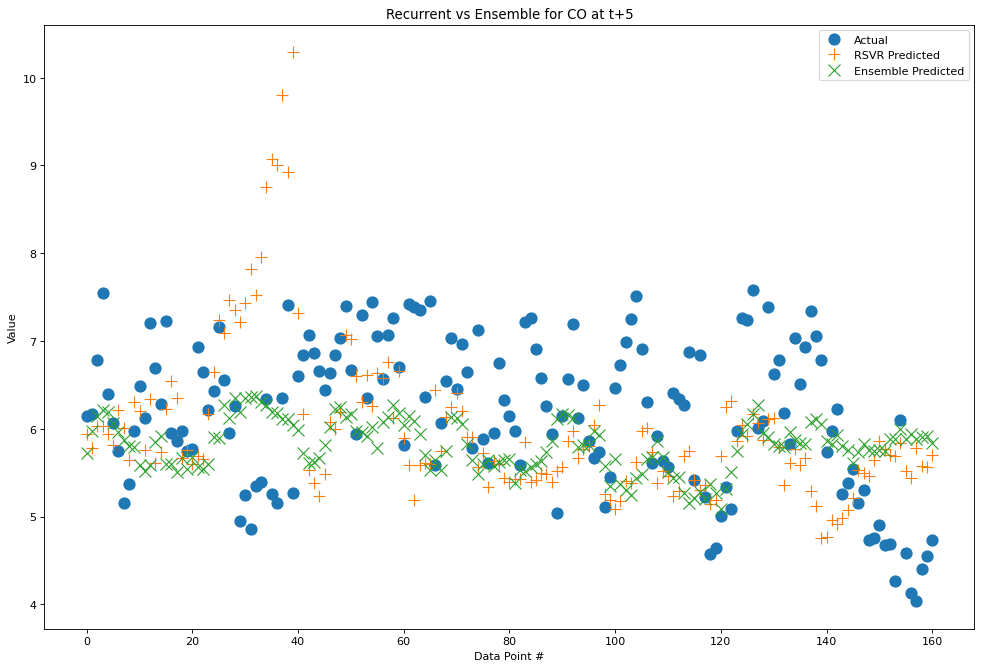

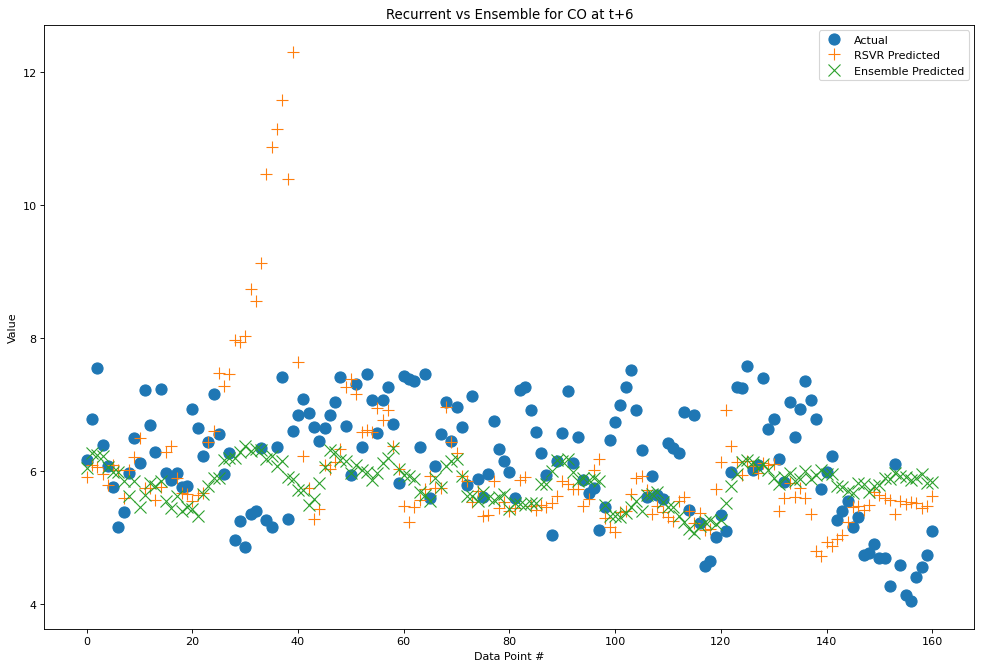

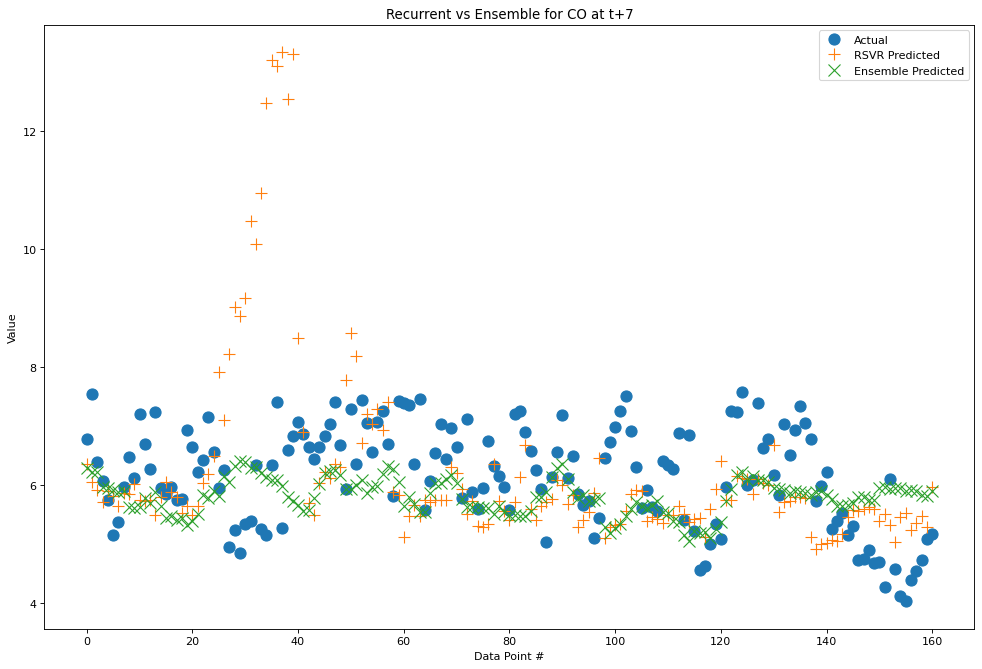

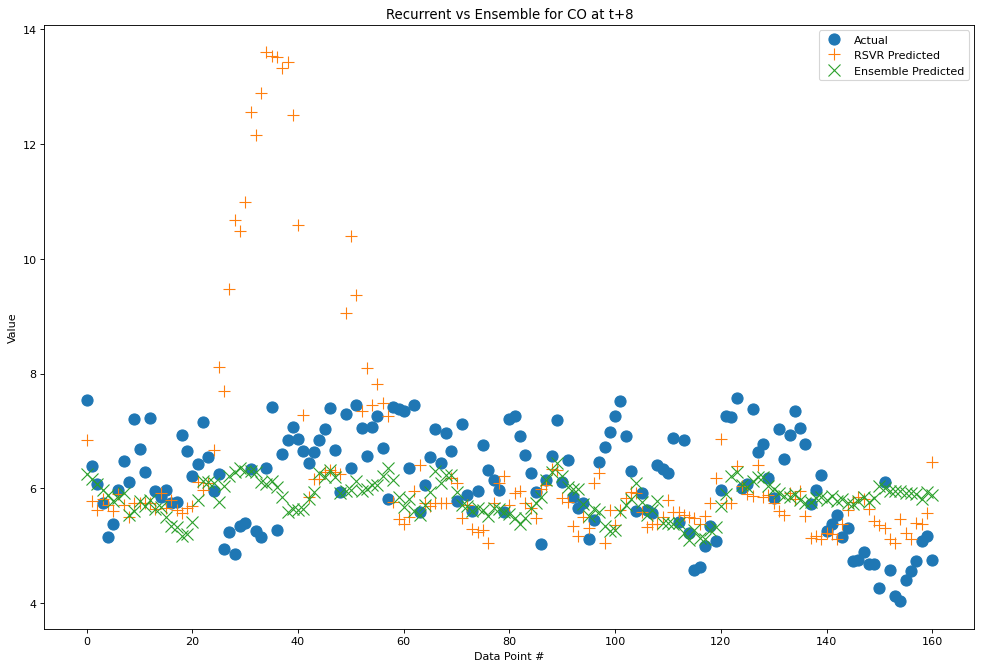

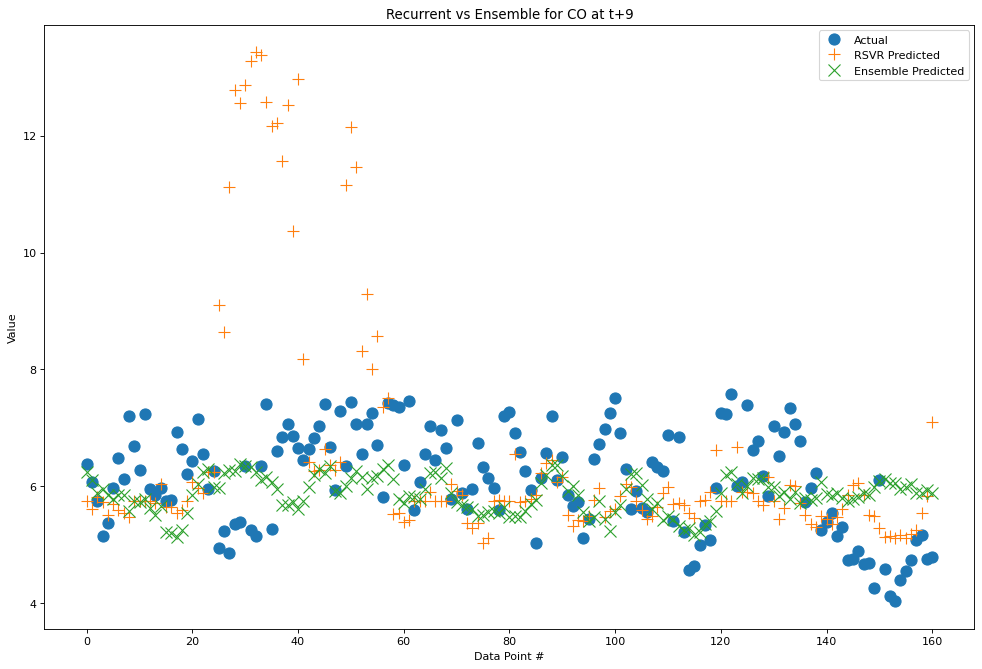

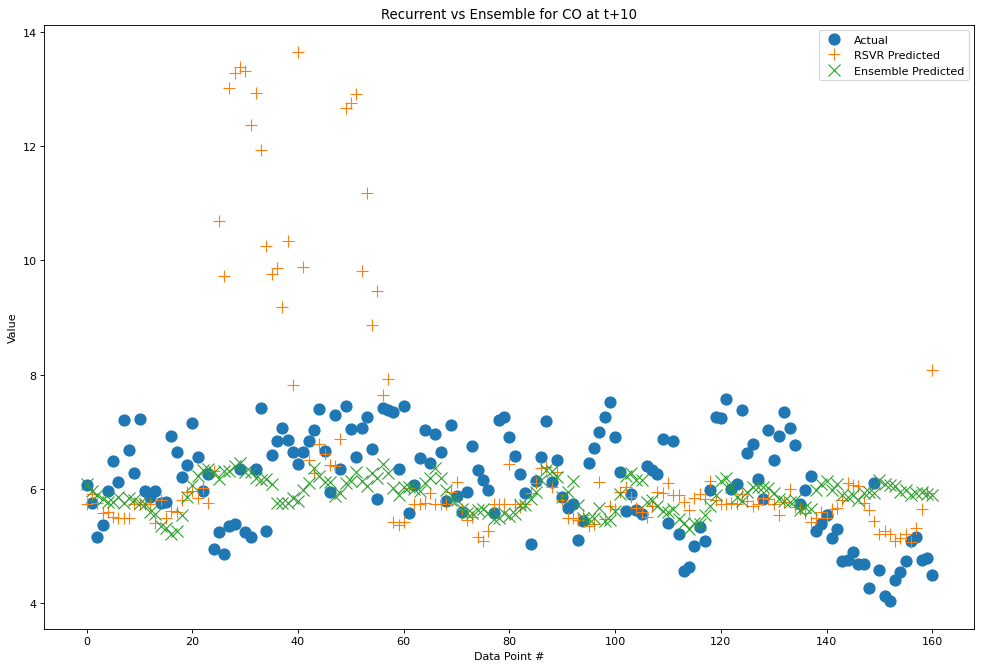

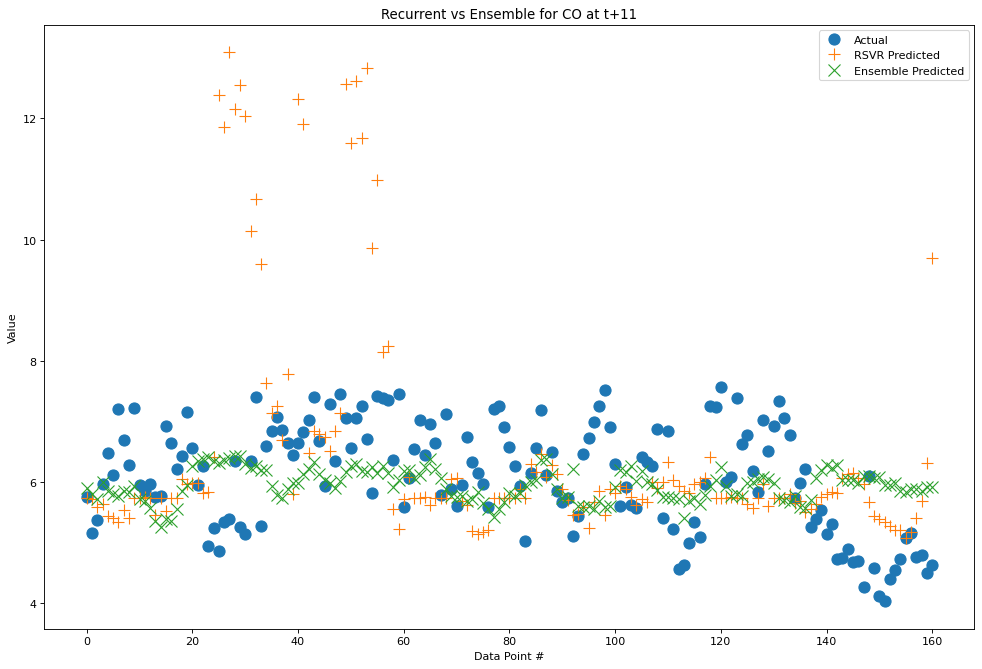

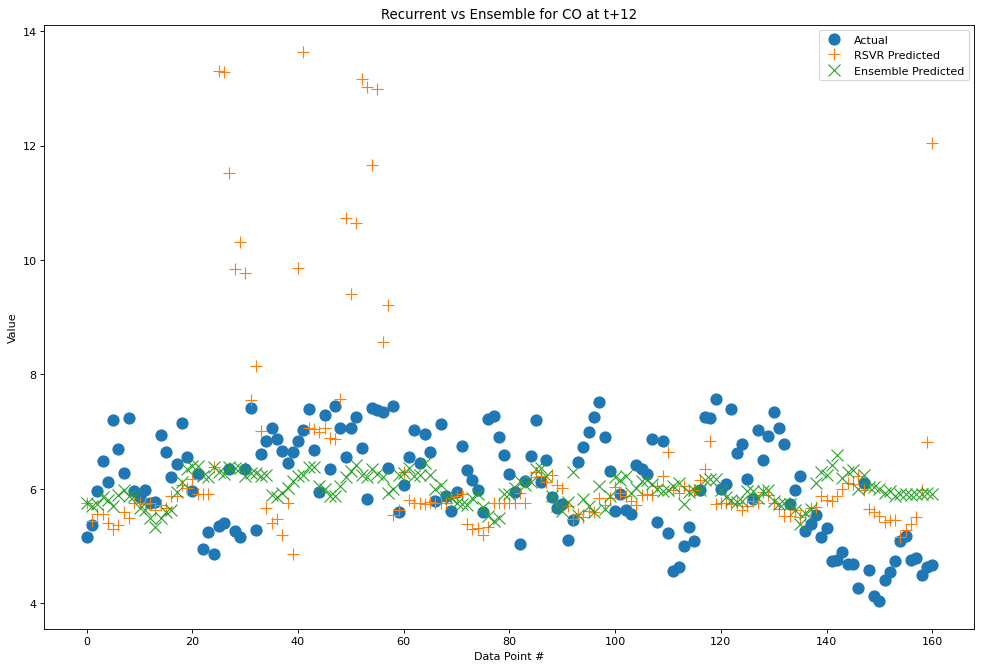

In [6]:
time_steps = [ 't+{}'.format(time) for time in range(1, 13) ]
for time_step in time_steps:
    plot_actualversus(apc_list[0], time_step)

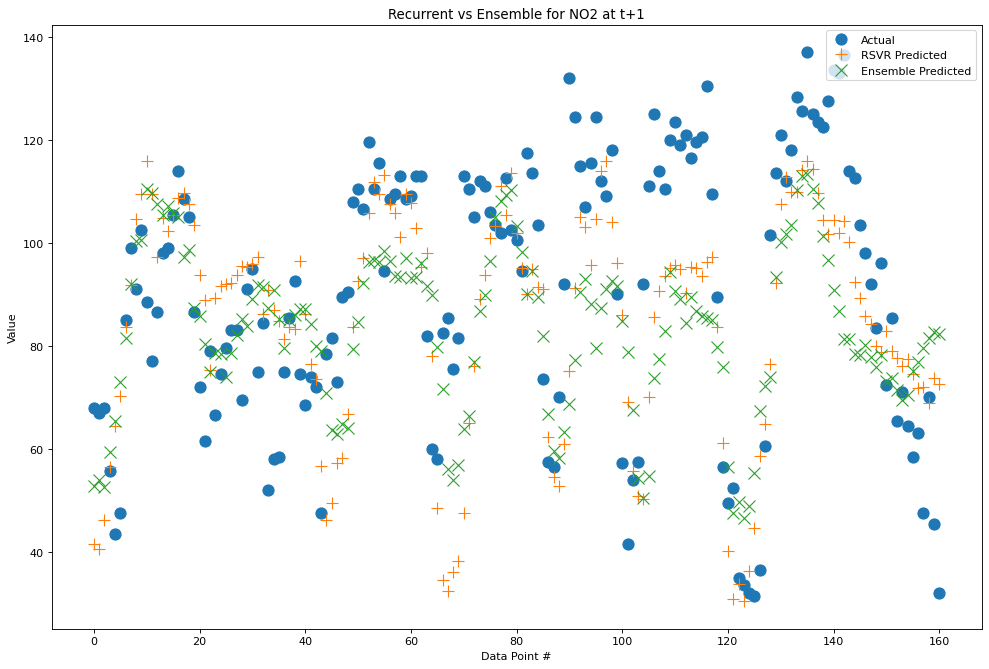

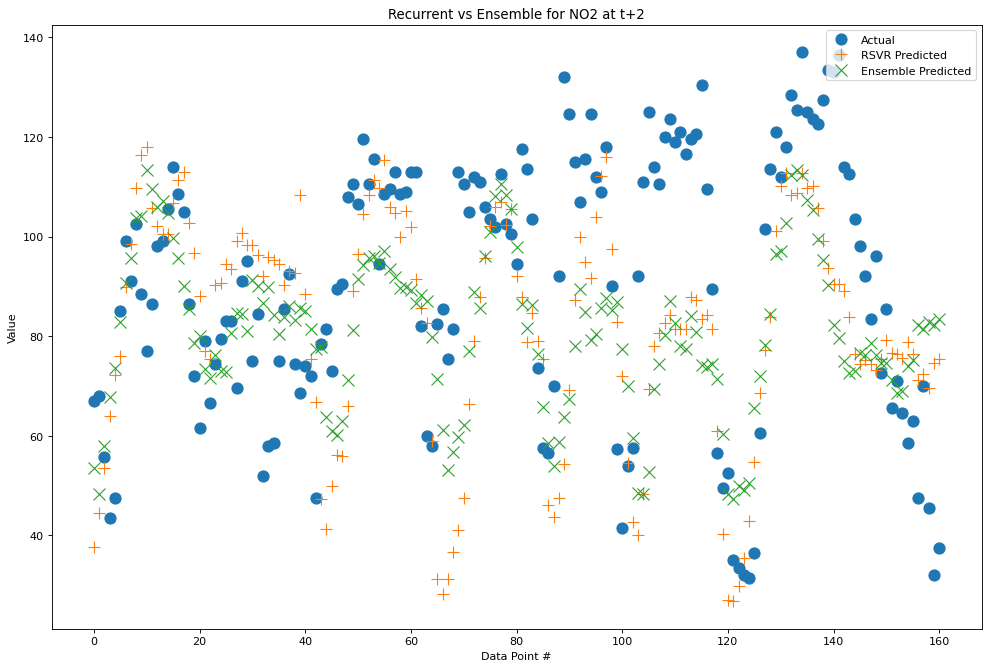

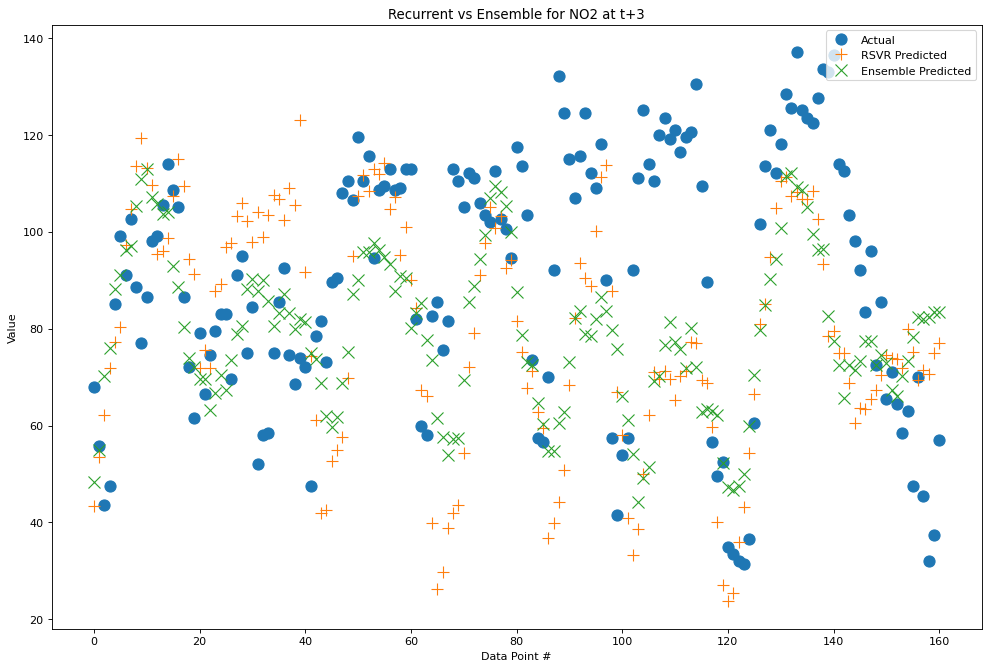

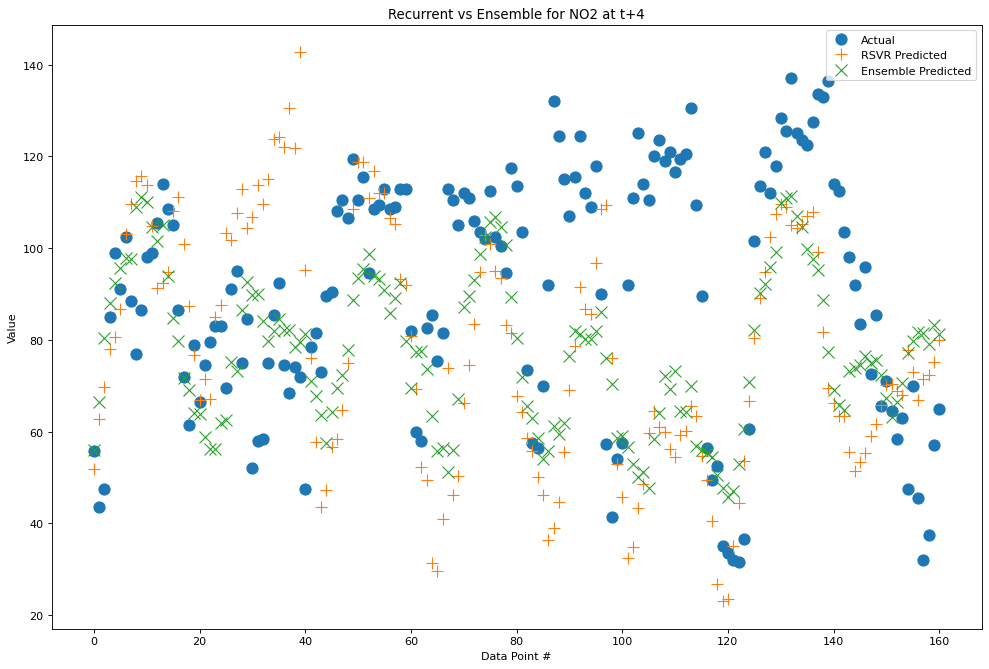

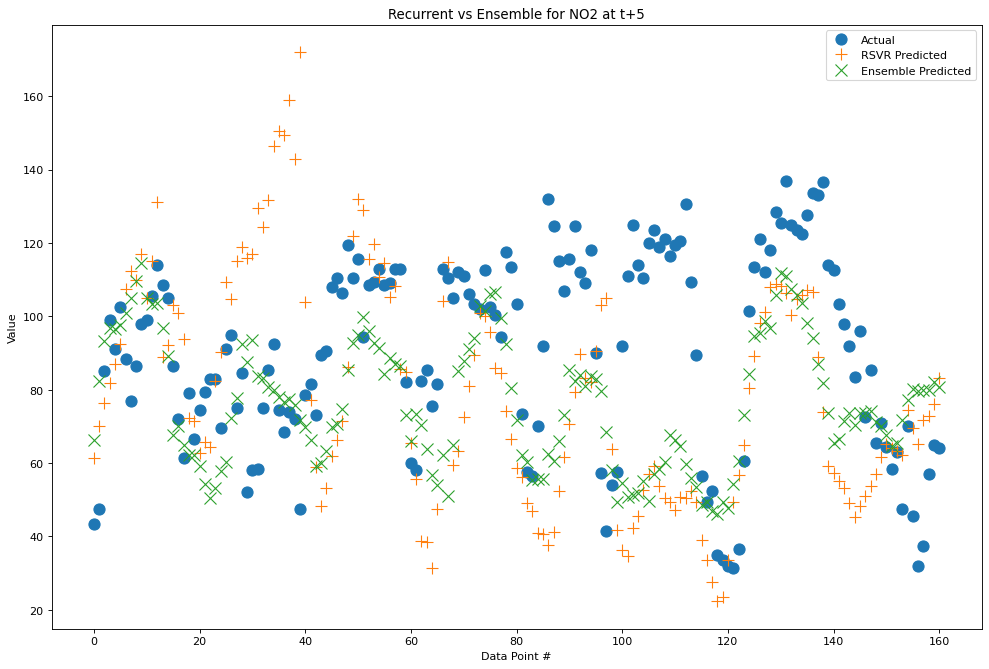

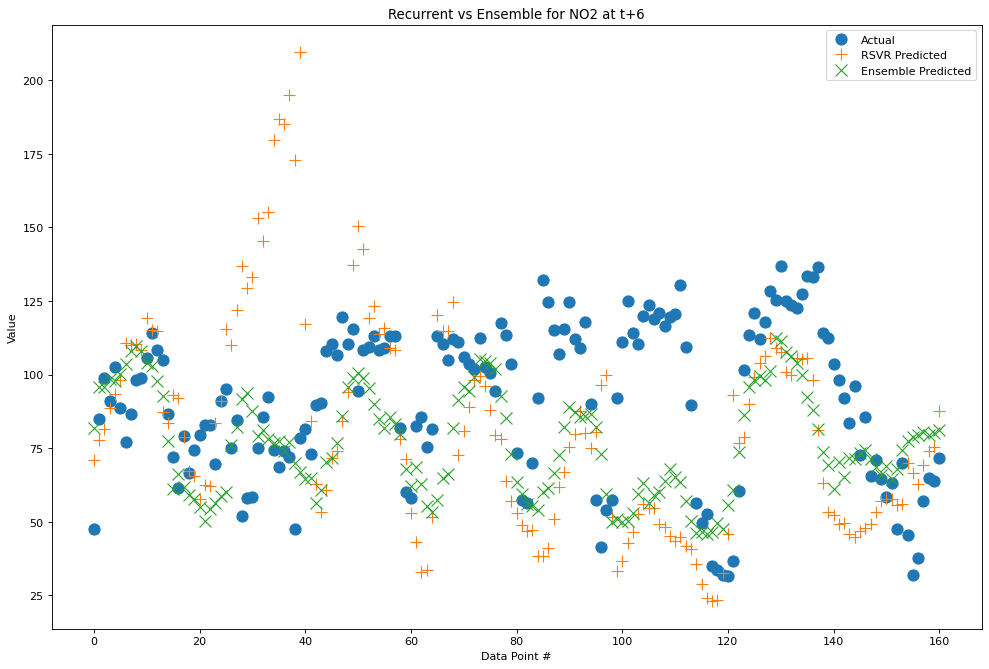

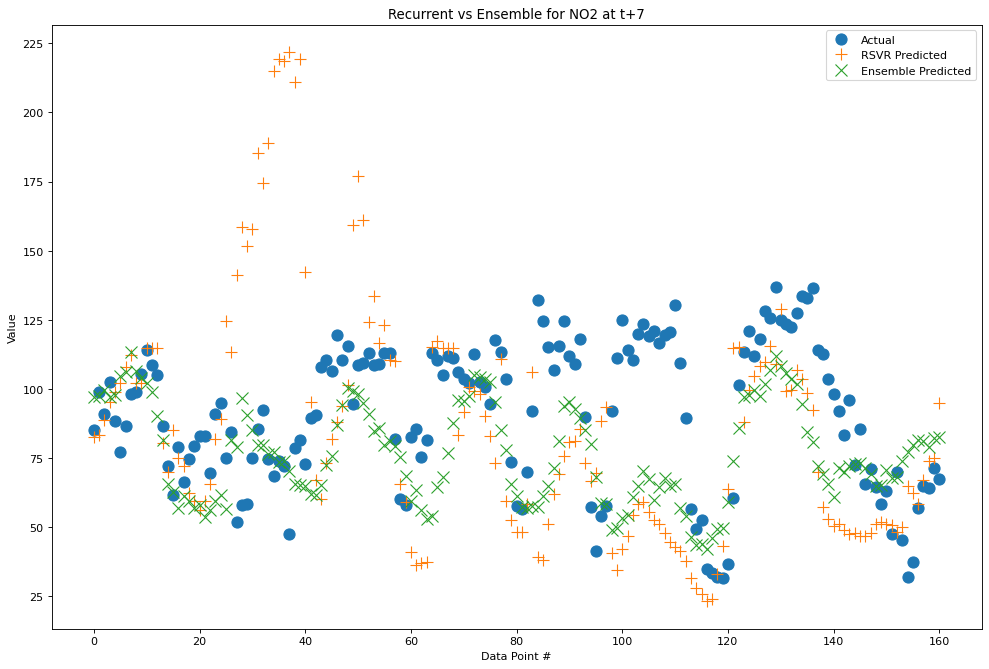

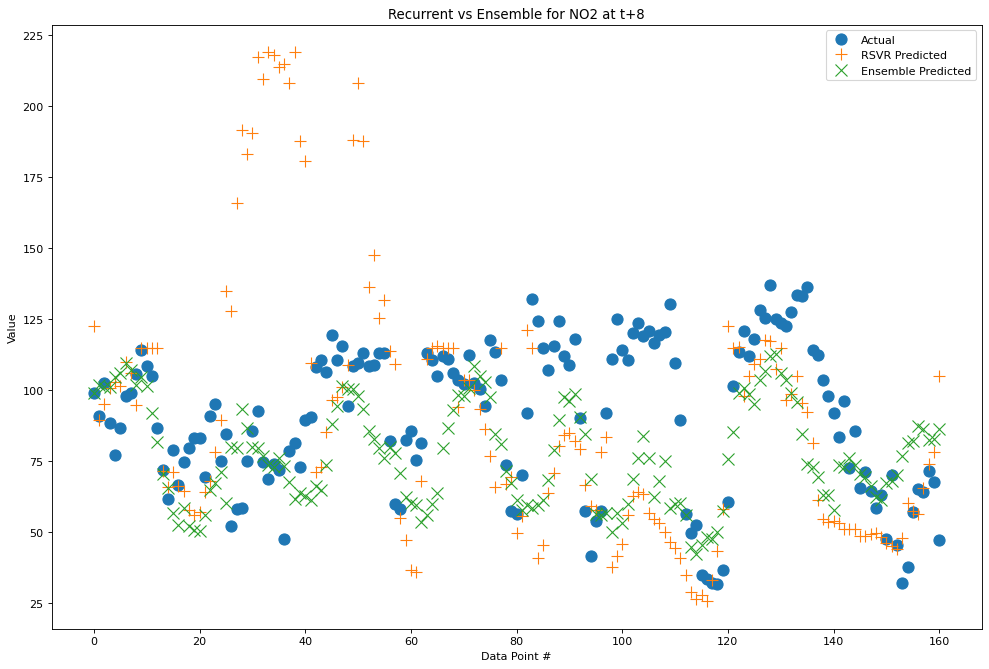

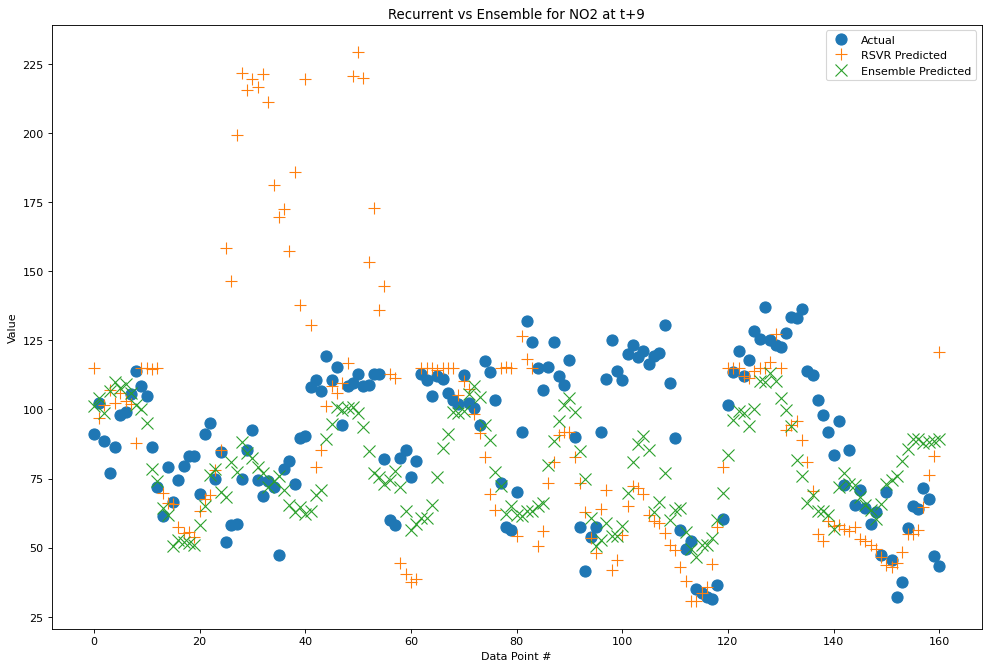

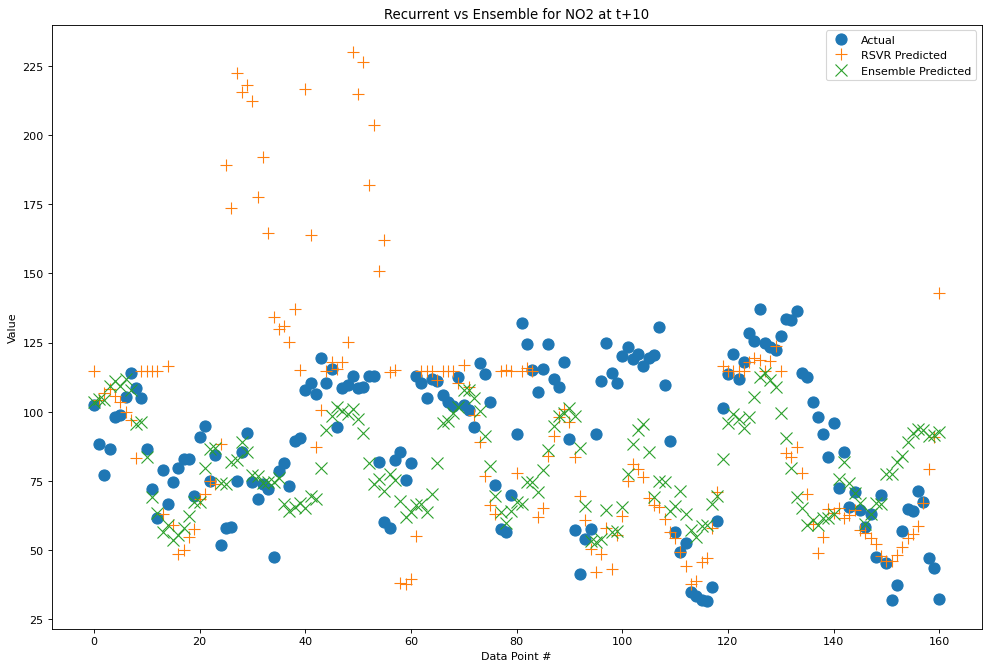

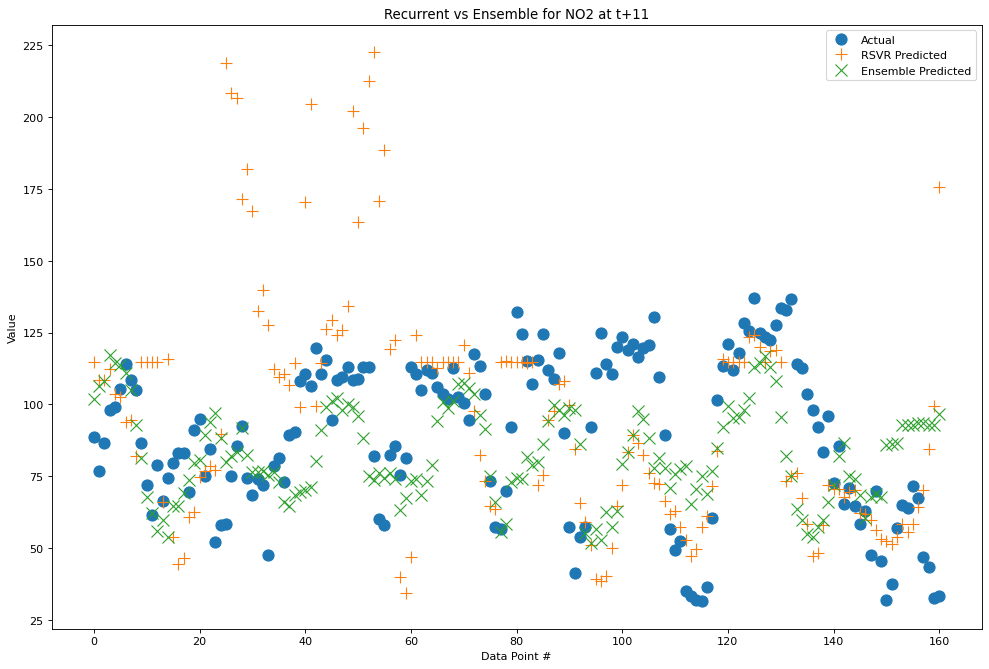

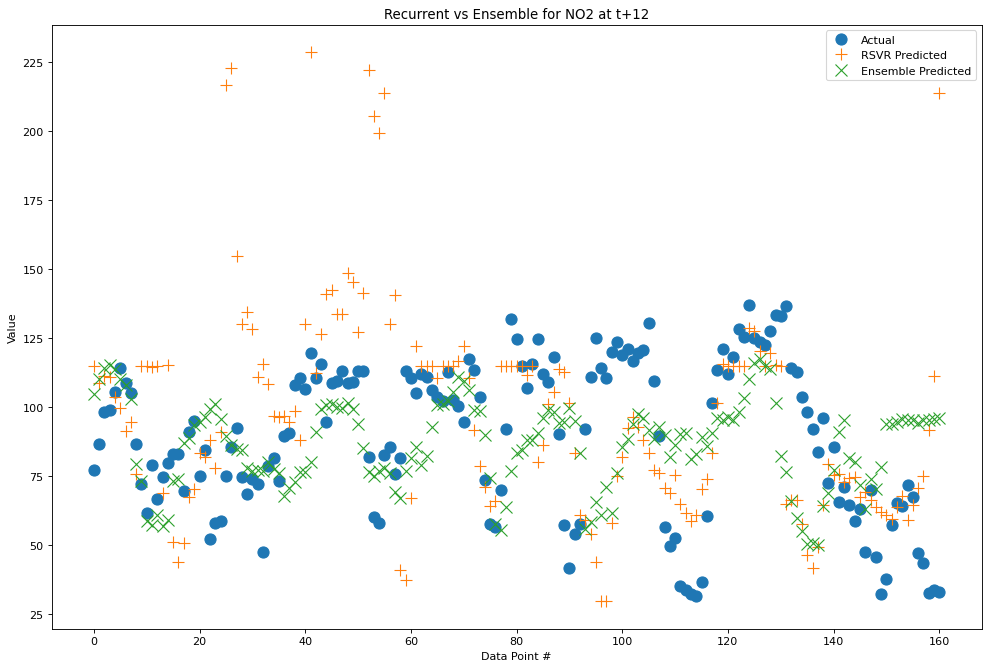

In [7]:
for time_step in time_steps:
    plot_actualversus(apc_list[1], time_step)

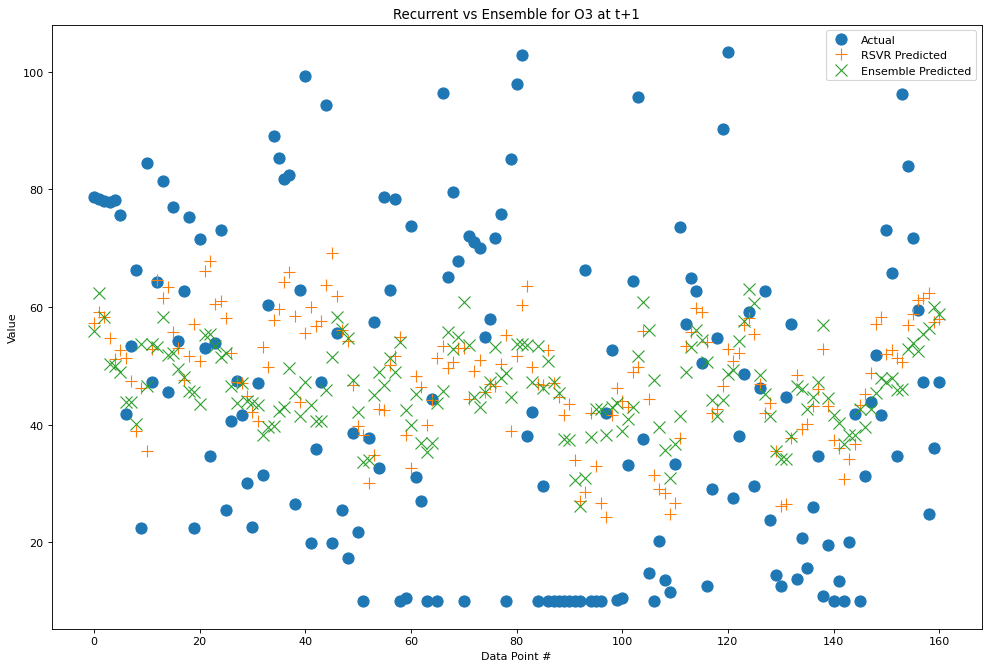

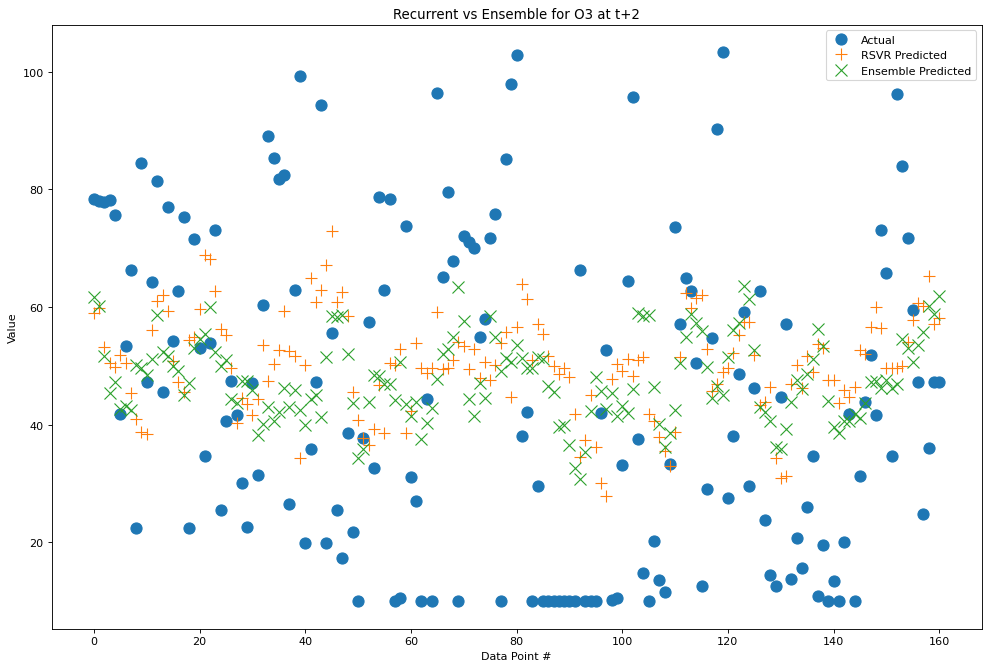

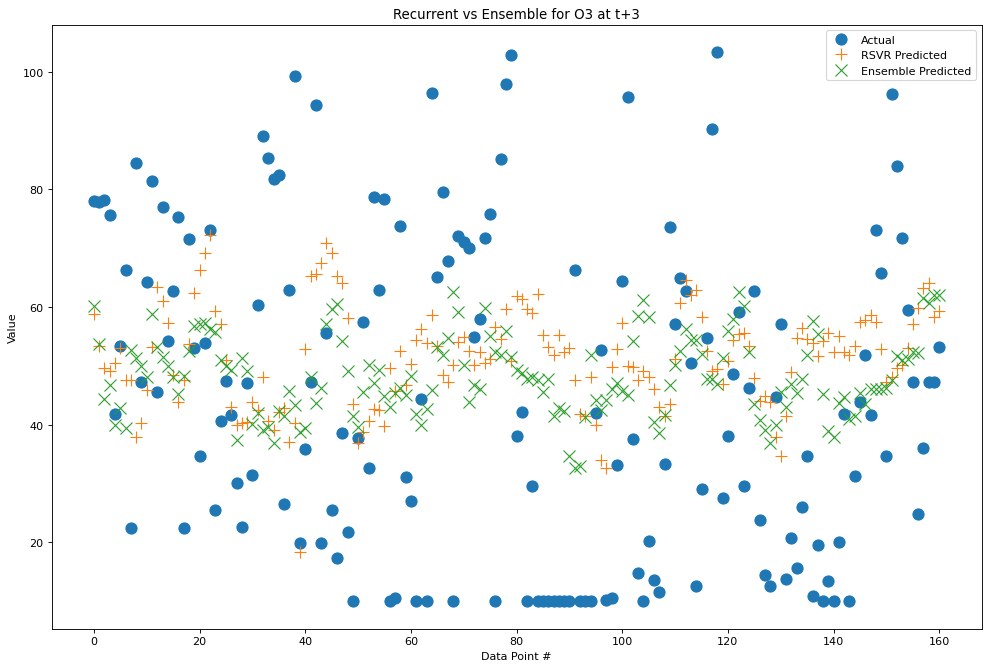

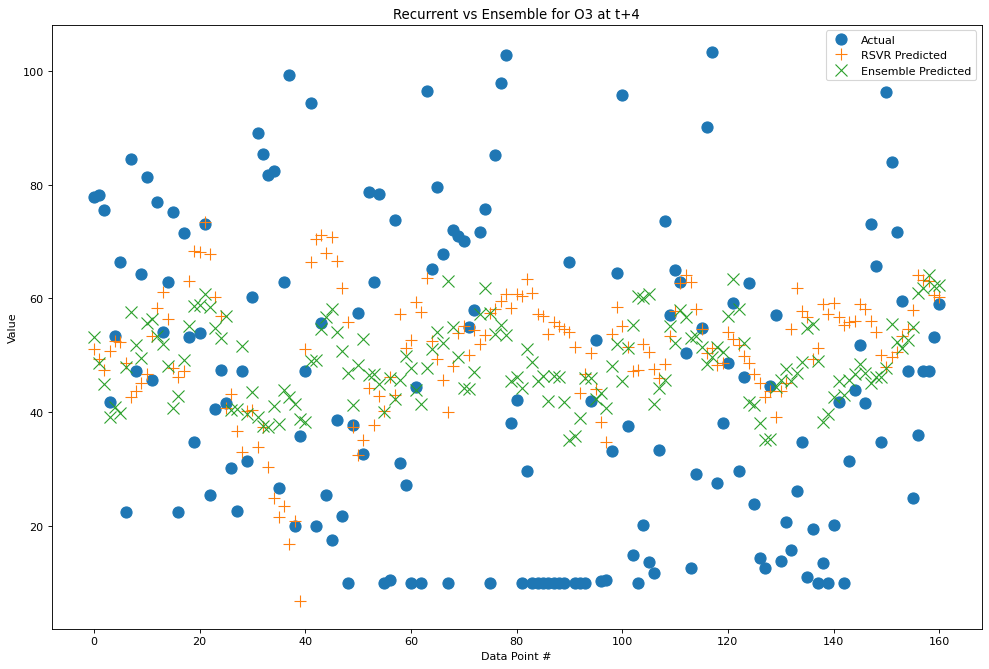

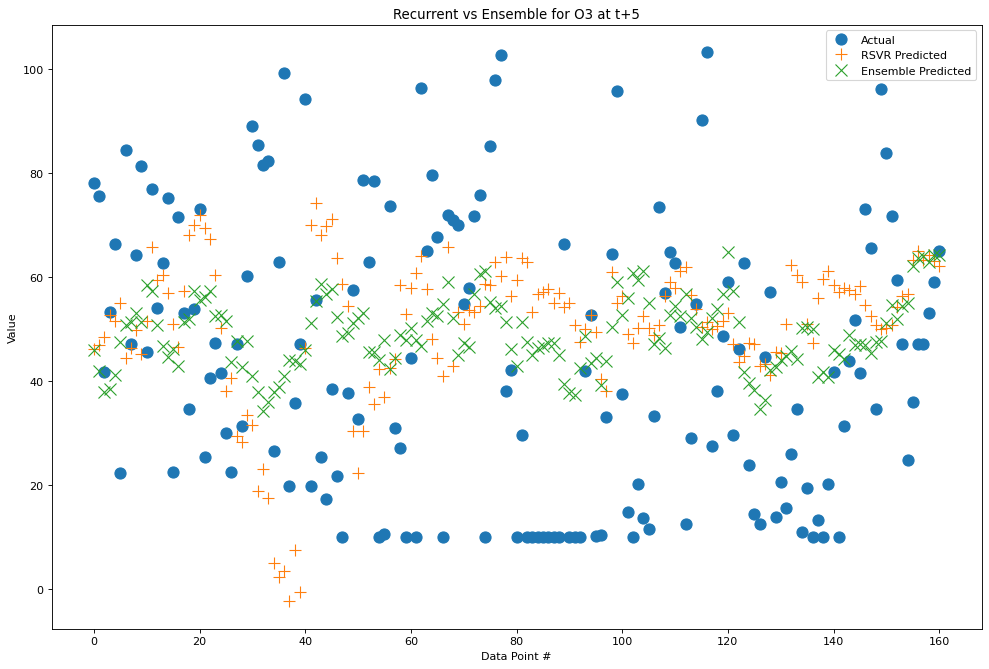

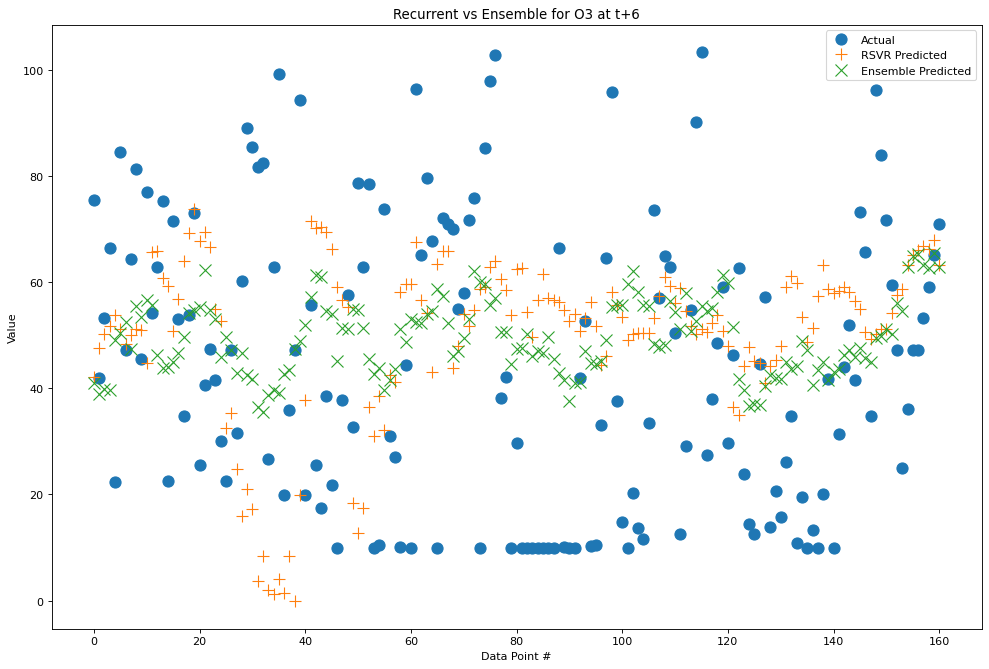

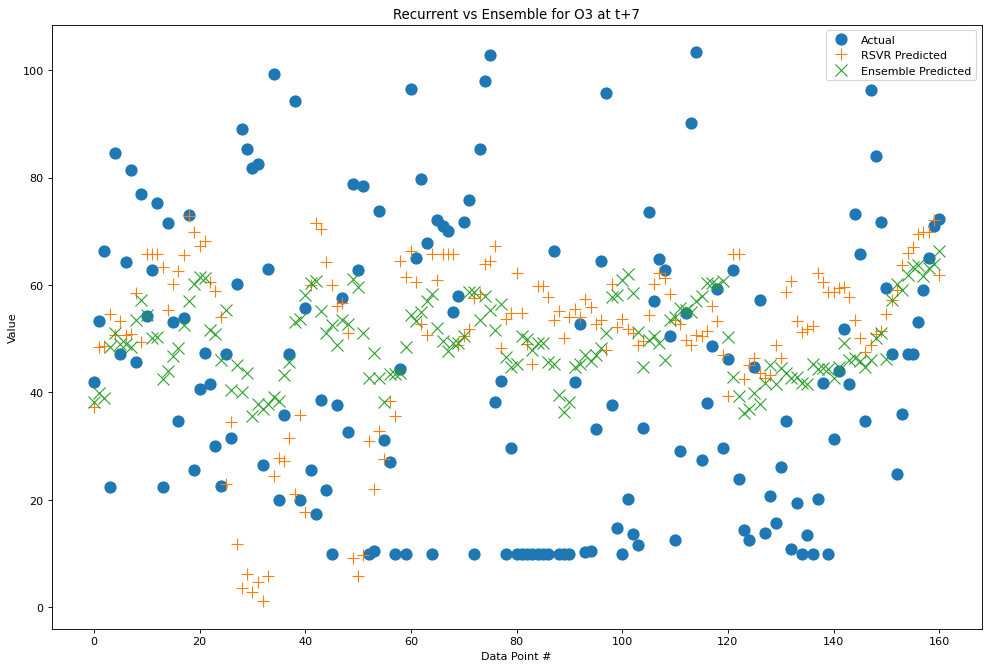

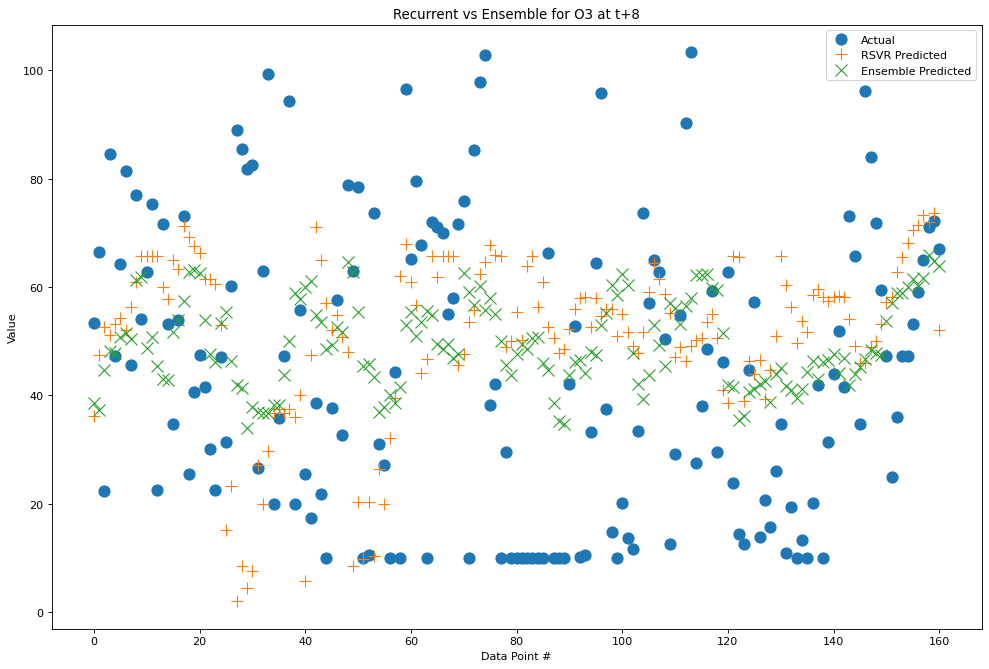

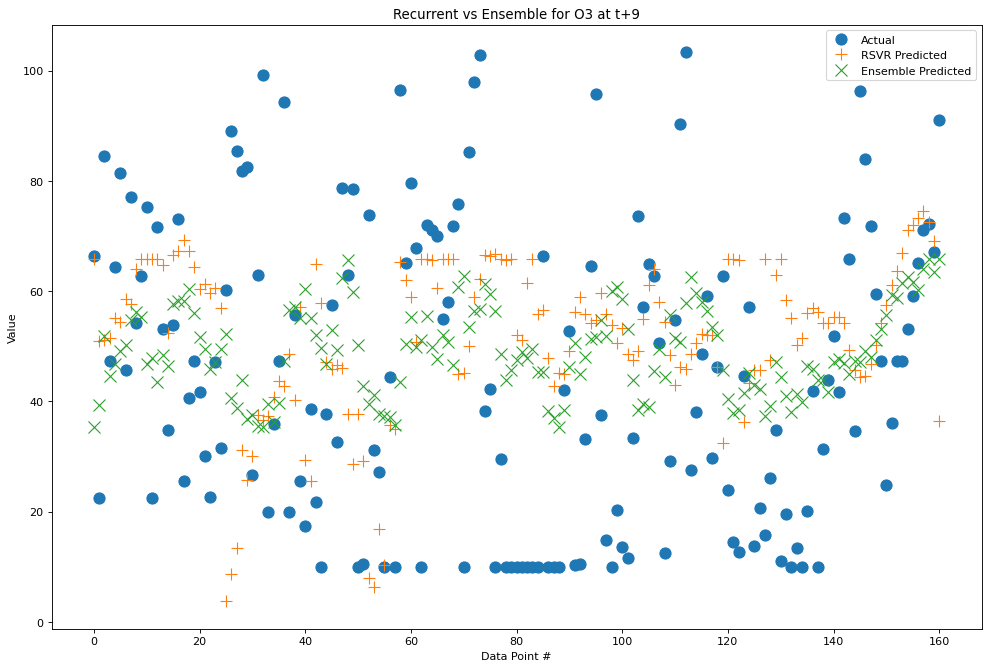

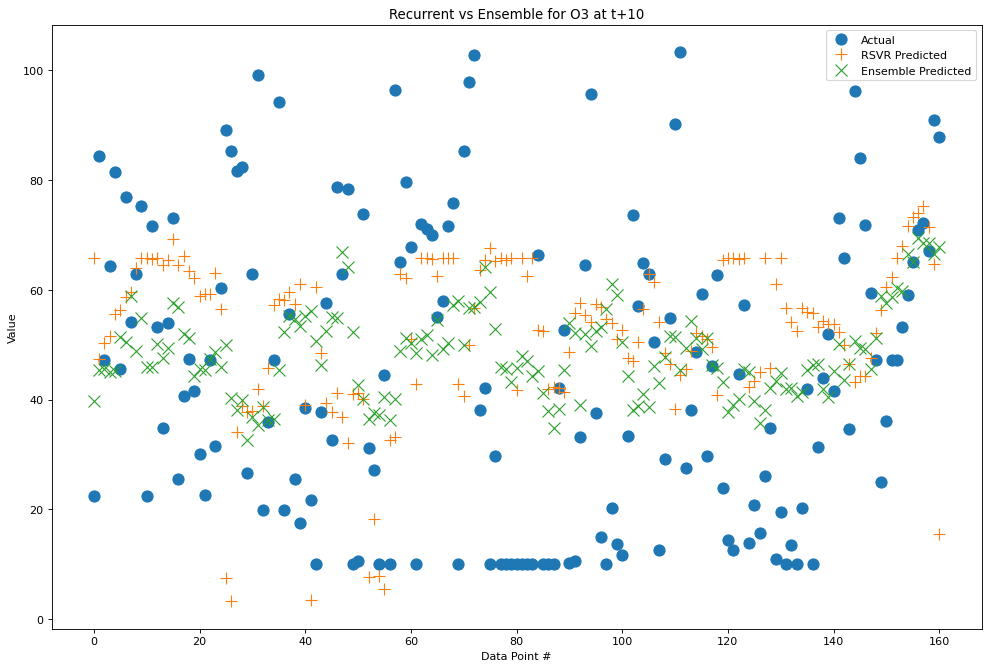

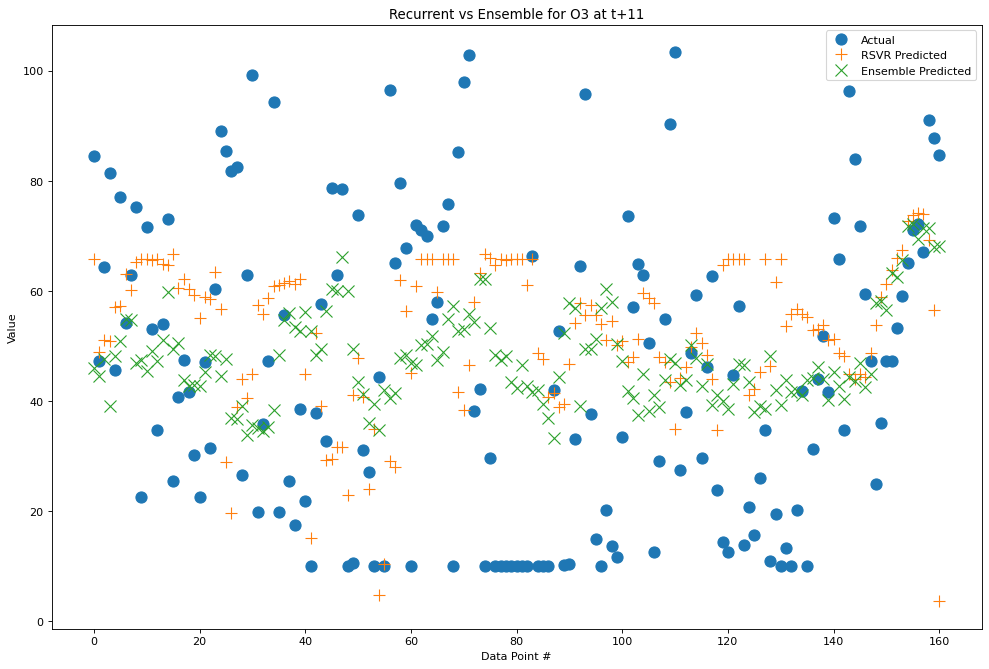

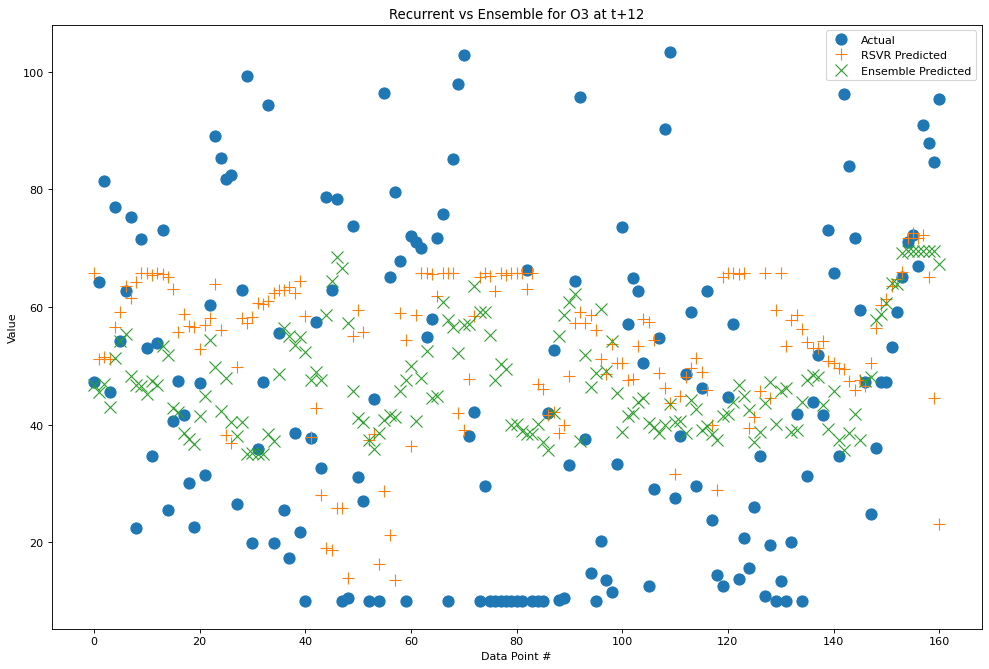

In [8]:
for time_step in time_steps:
    plot_actualversus(apc_list[2], time_step)

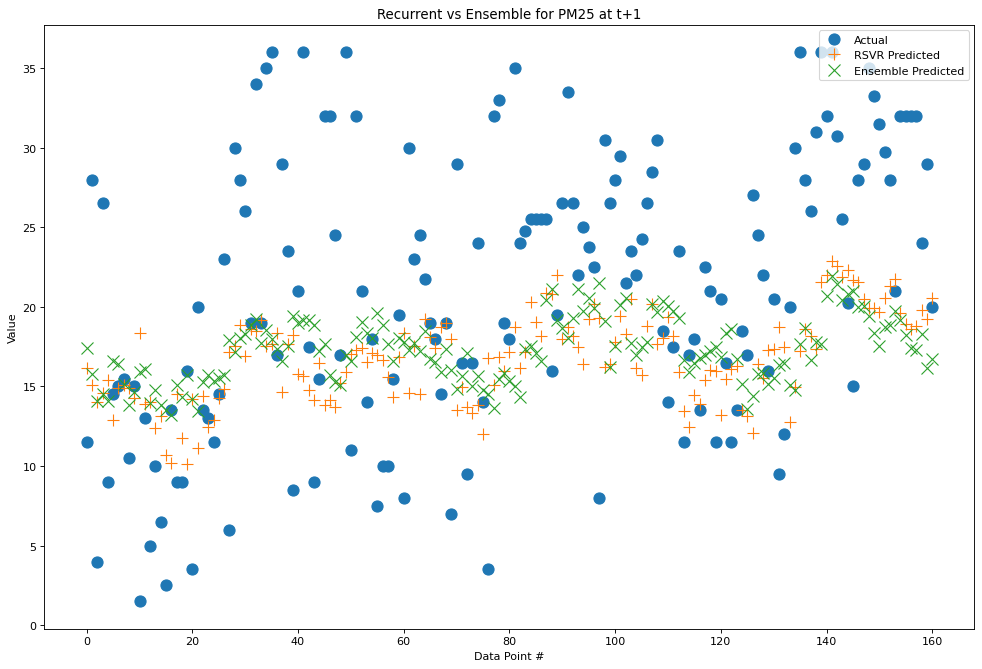

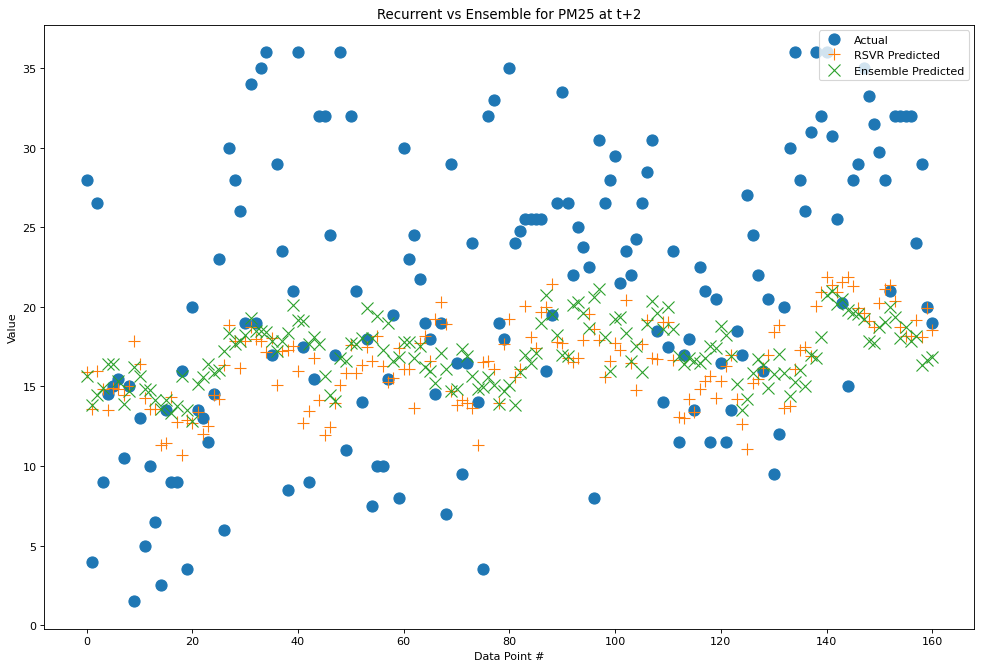

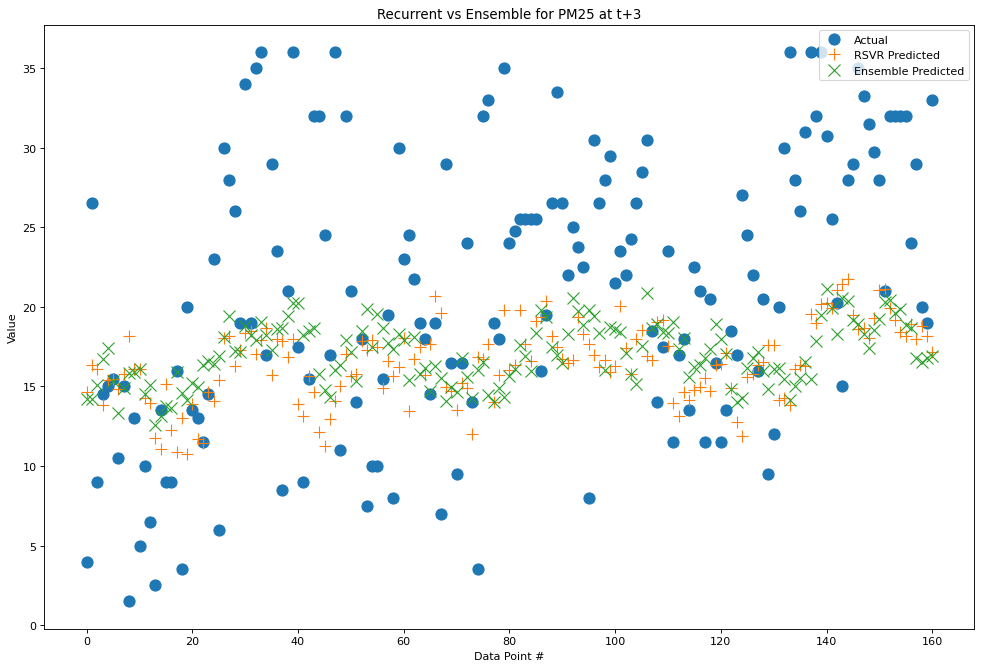

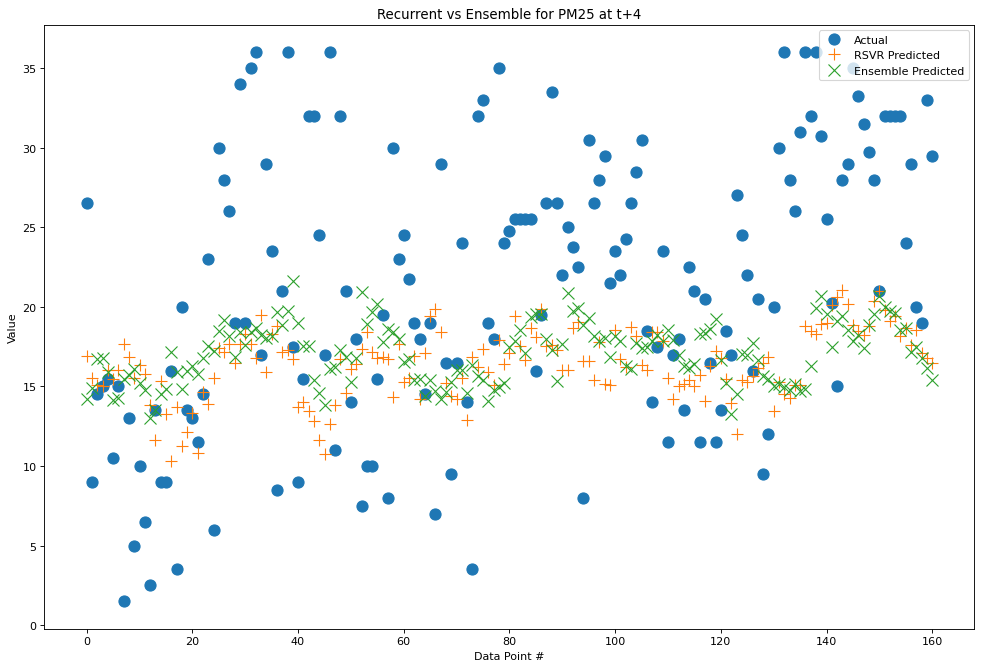

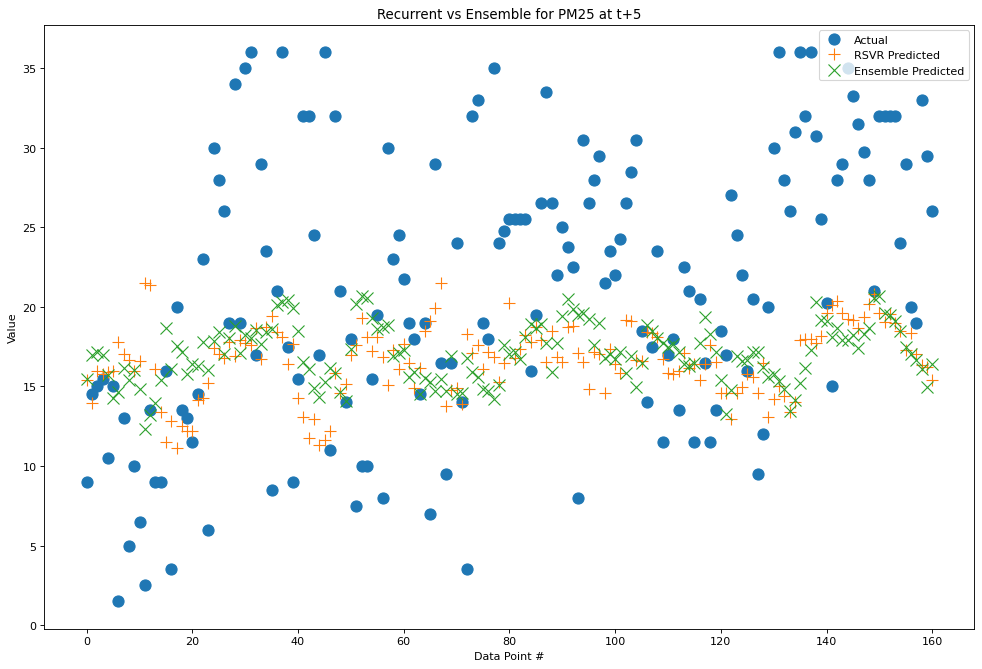

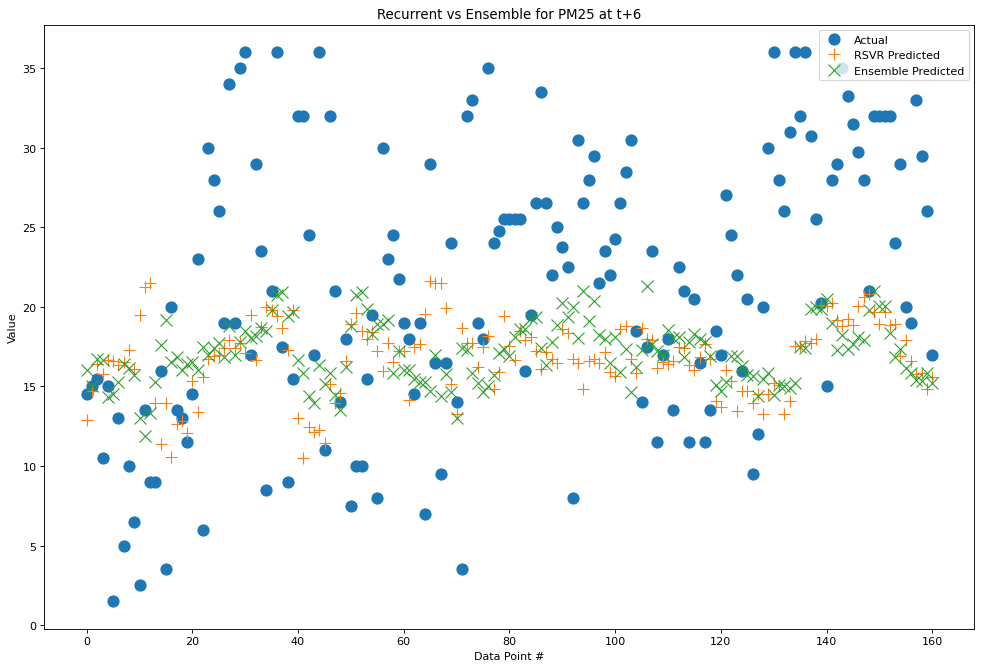

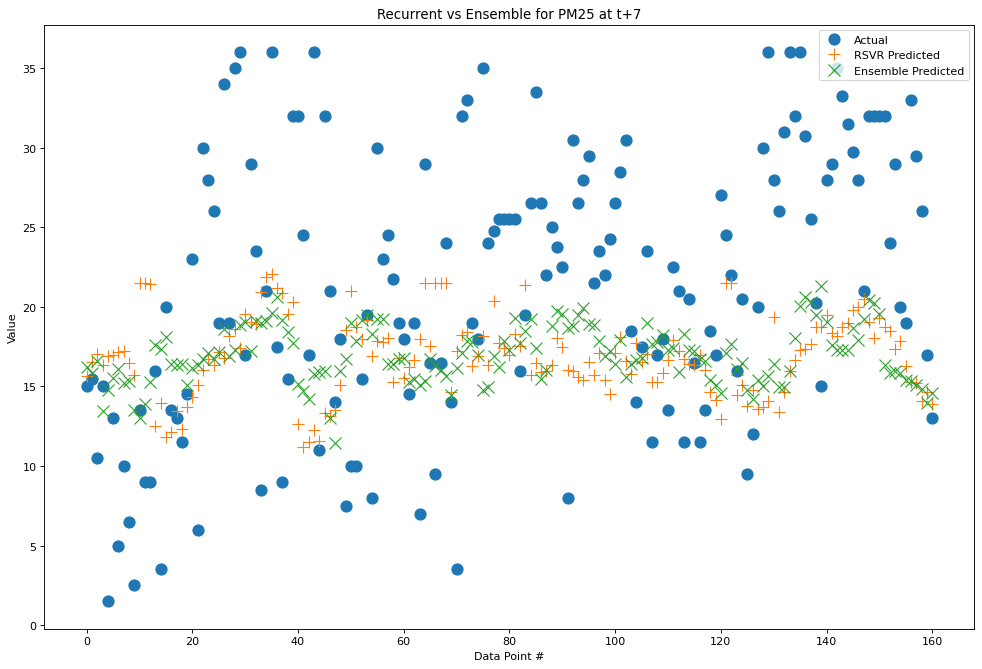

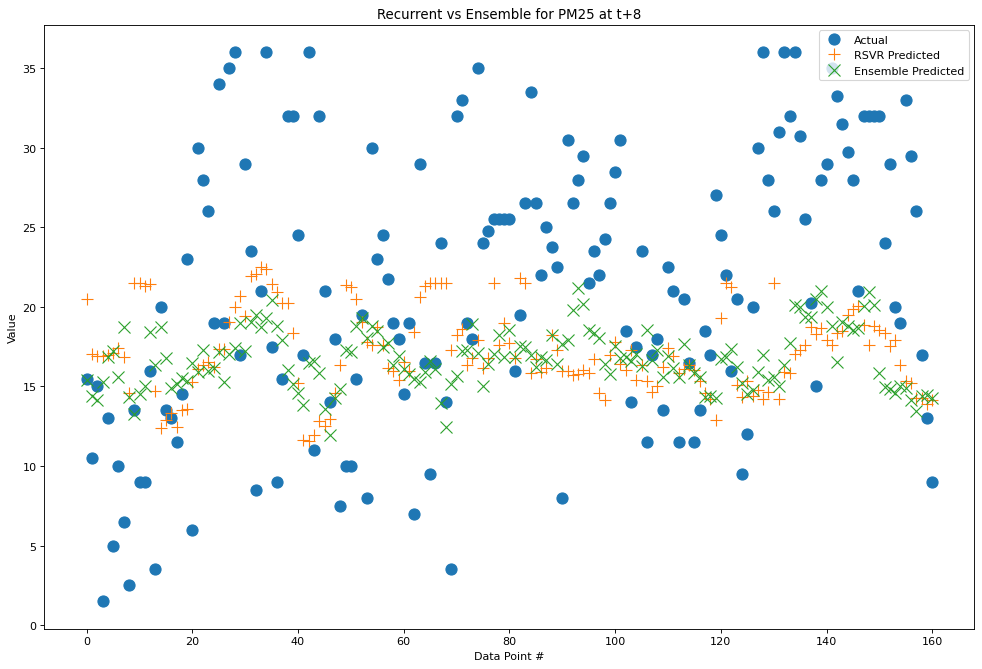

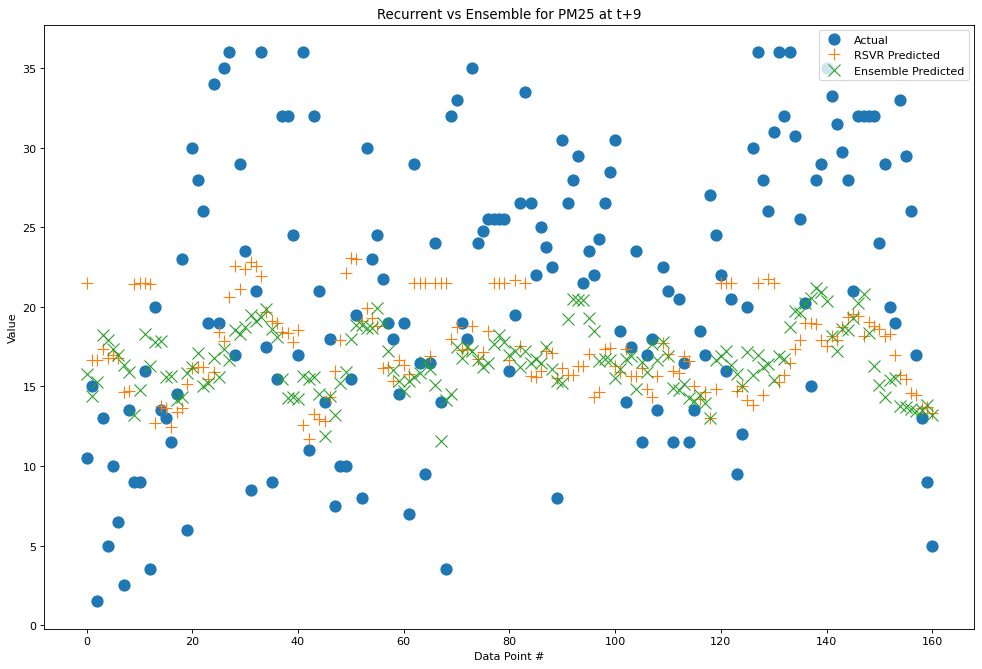

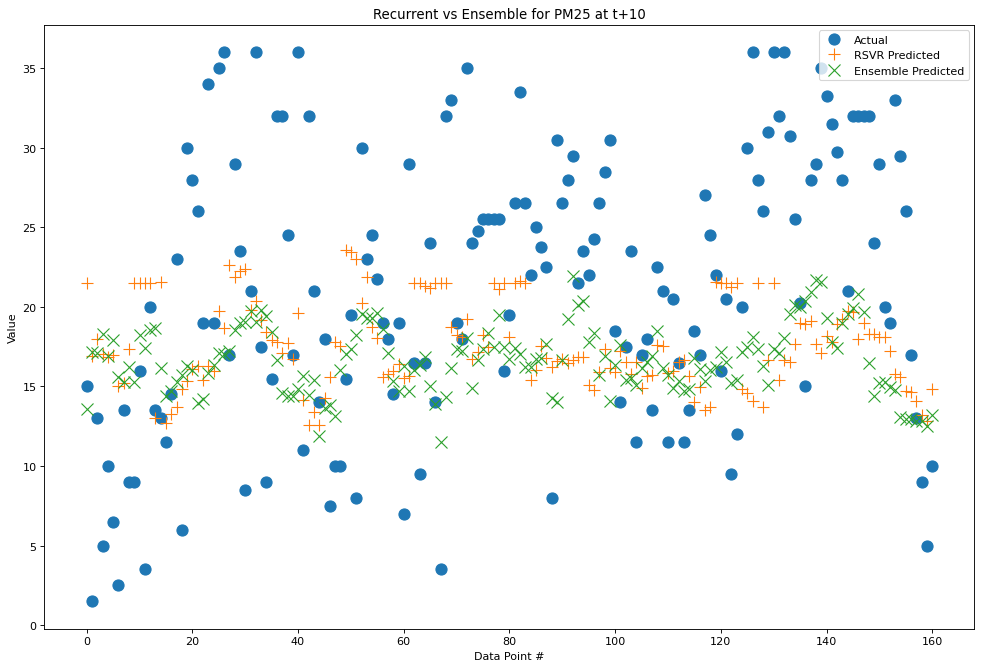

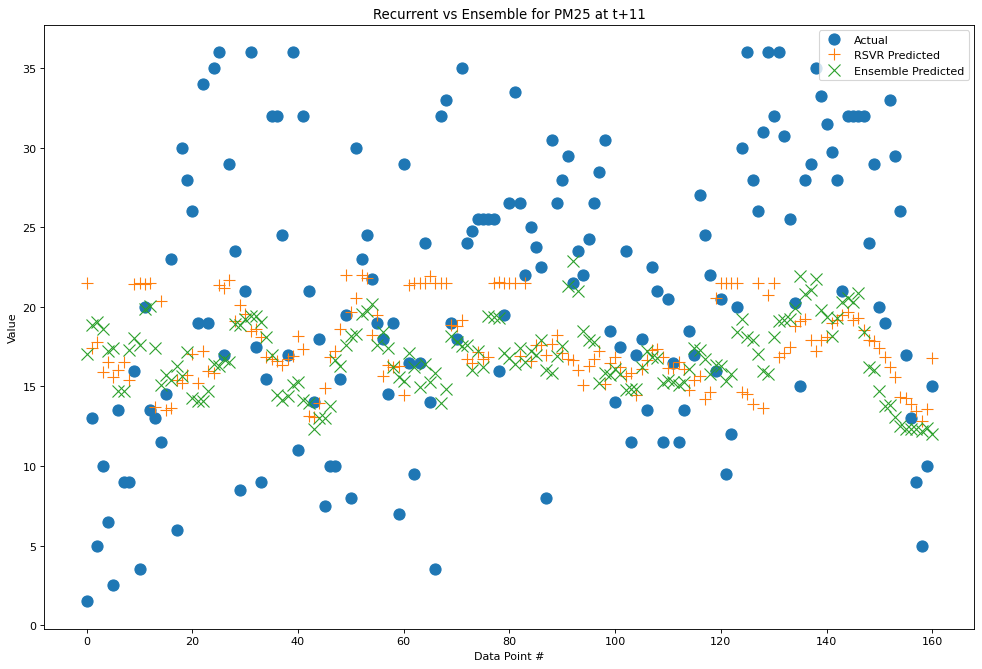

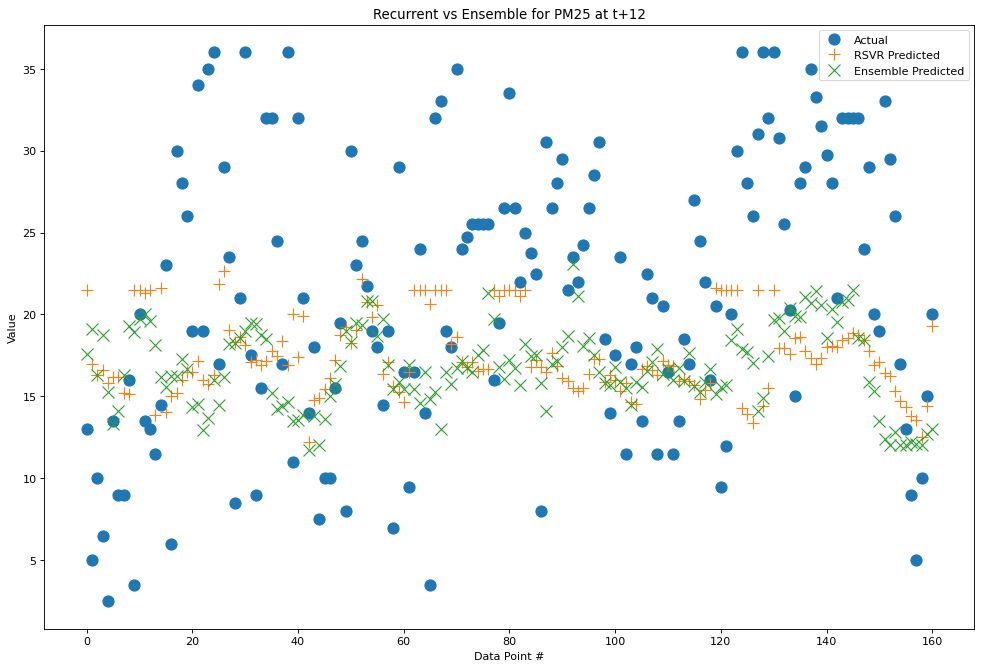

In [9]:
for time_step in time_steps:
    plot_actualversus(apc_list[3], time_step)

# PLCC (excluding ensemble)

In [119]:
apc_names = list(plcc_dict.keys())
excludes = ['Stacking Ensemble']
def plot_plcc(name, exclude=None, plot_absolute=True):
    plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
    plt.title(name)
    plt.xlabel('Time (in hours)')
    plt.ylabel('PLCC (higher is better)')
    if exclude is None:
        exclude = list()
    for model_name, plcc_points in plcc_dict[name].items():
        if model_name in exclude:
            continue
        x_points = [point[0] for point in plcc_points]
        if plot_absolute:
            y_points = [abs(point[1]) for point in plcc_points]
        else:
            y_points = [point[1] for point in plcc_points]
        plt.plot(x_points, y_points, '-^', linewidth=2, label=model_name, ms=10)
    plt.legend(loc='upper right')

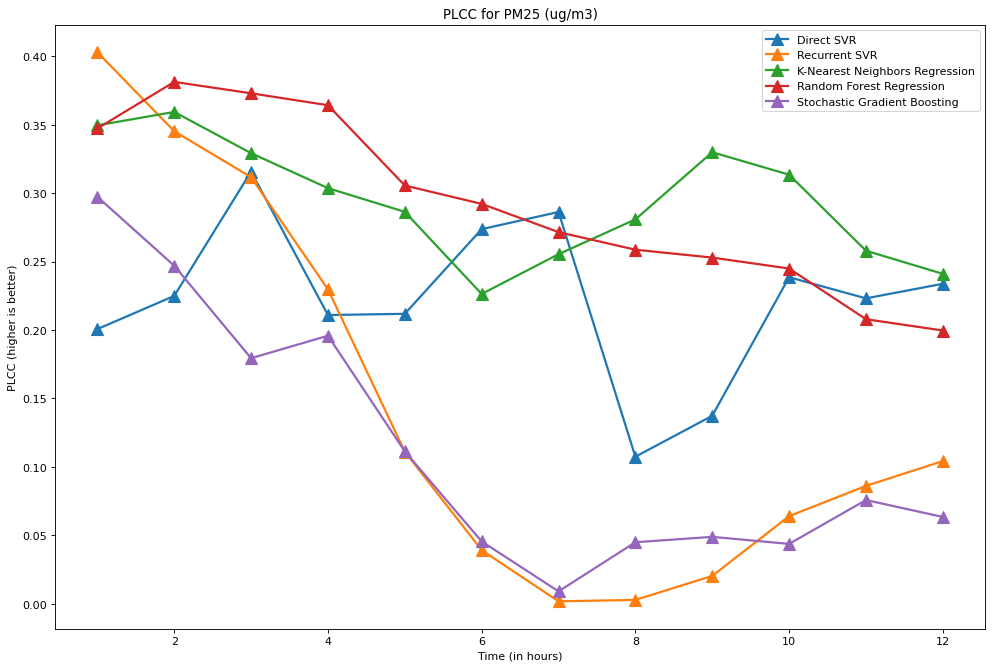

In [120]:
apc_name = apc_names[0]
plot_plcc(apc_name, excludes)

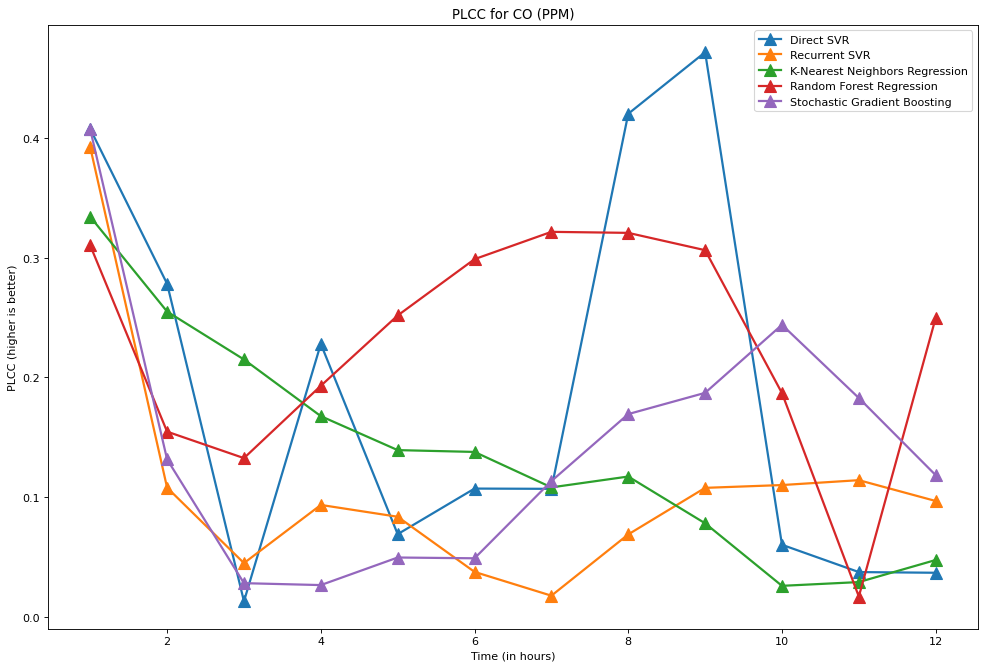

In [121]:
apc_name = apc_names[1]
plot_plcc(apc_name, excludes)

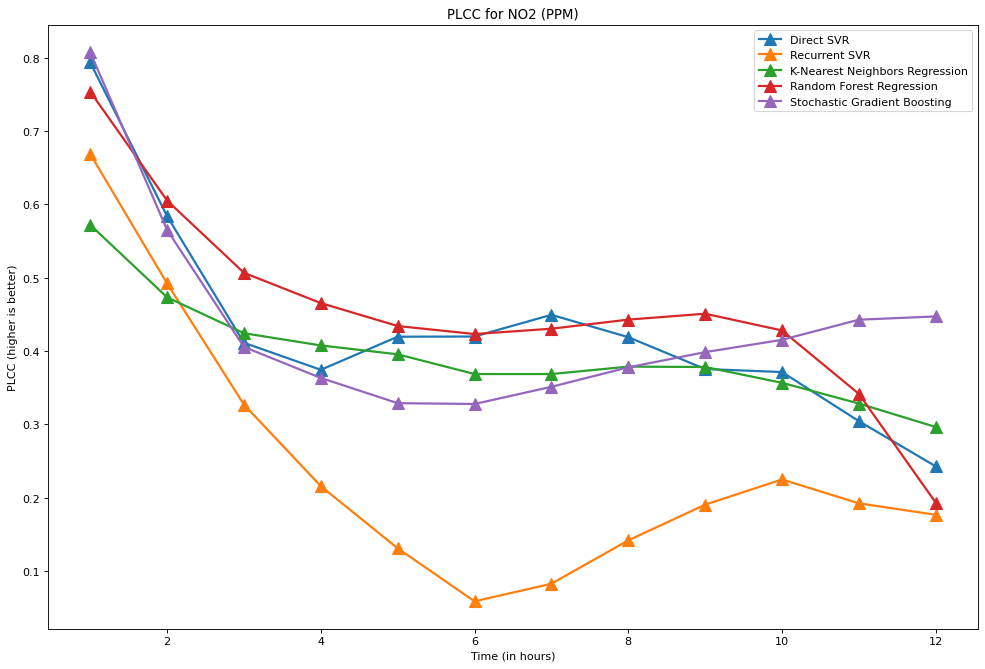

In [122]:
apc_name = apc_names[2]
plot_plcc(apc_name, excludes)

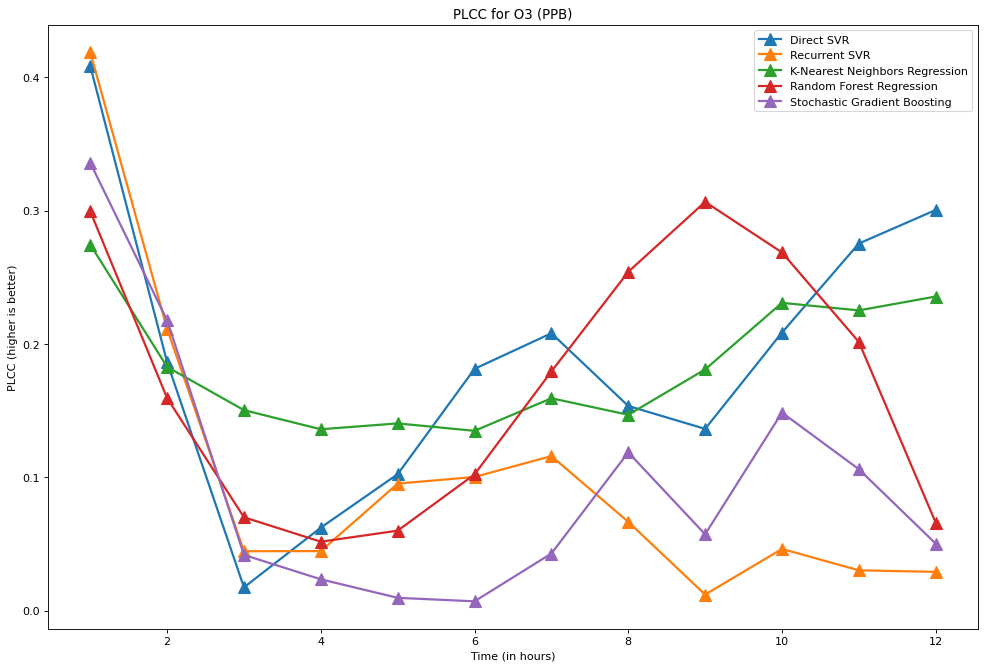

In [123]:
apc_name = apc_names[3]
plot_plcc(apc_name, excludes)

# RMSE (excluding ensemble)

In [127]:
apc_names = list(rmse_dict.keys())
excludes = ['Stacking Ensemble']
def plot_rmse(name, exclude=None):
    plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
    plt.title(name)
    plt.xlabel('Time (in hours)')
    plt.ylabel('RMSE (lower is better)')
    if exclude is None:
        exclude = list()
    for model_name, rmse_points in rmse_dict[name].items():
        if model_name in exclude:
            continue
        x_points = [point[0] for point in rmse_points]
        y_points = [point[1] for point in rmse_points]
        plt.plot(x_points, y_points, '-^', linewidth=2, label=model_name, ms=10)
    plt.legend(loc='upper right')

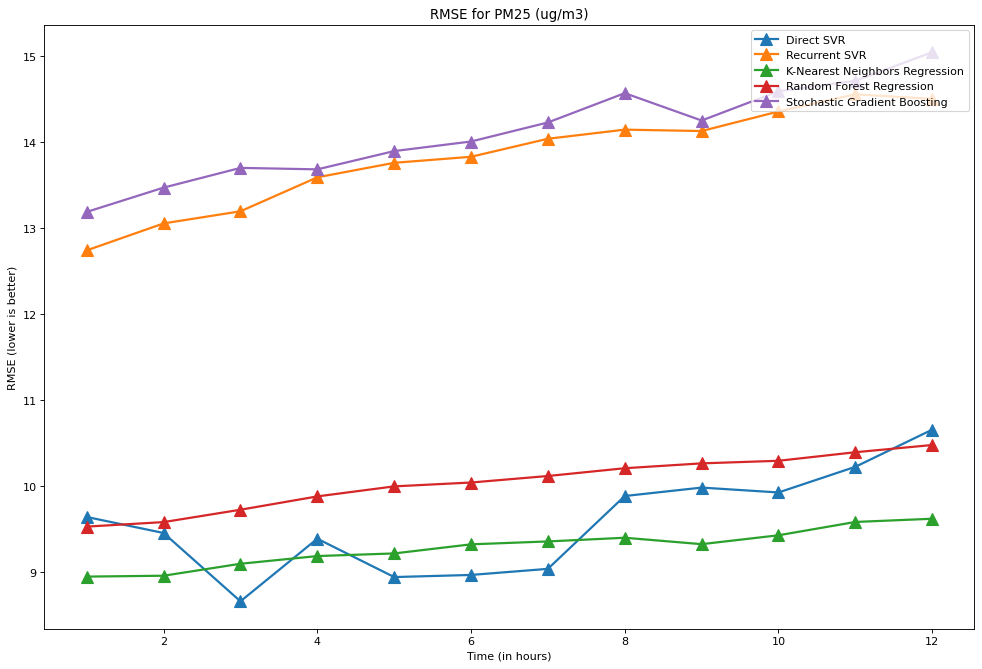

In [128]:
apc_name = apc_names[0]
plot_rmse(apc_name,excludes)

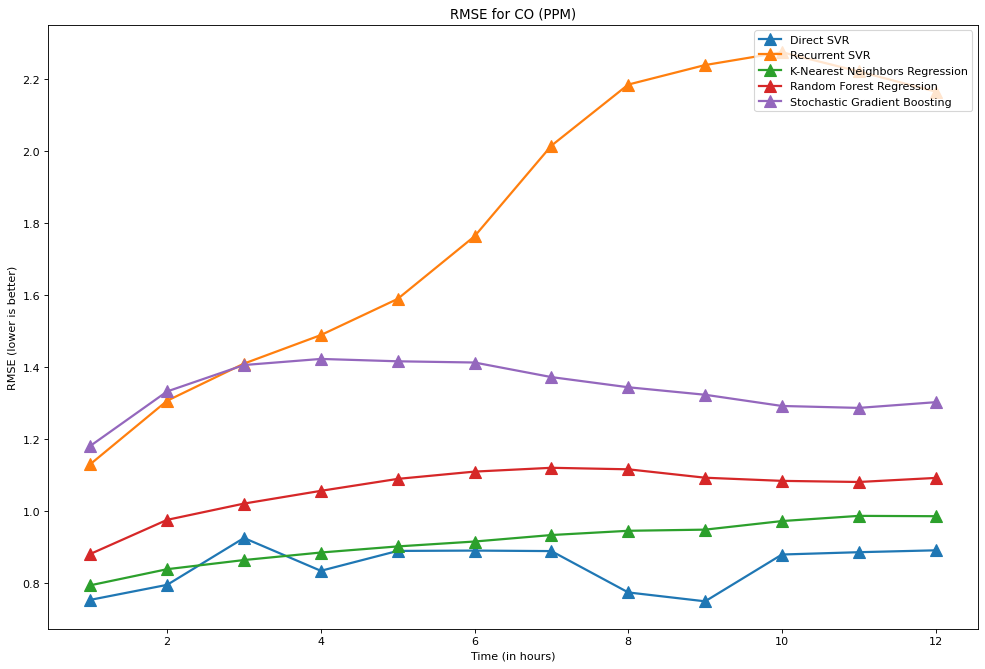

In [129]:
apc_name = apc_names[1]
plot_rmse(apc_name, excludes)

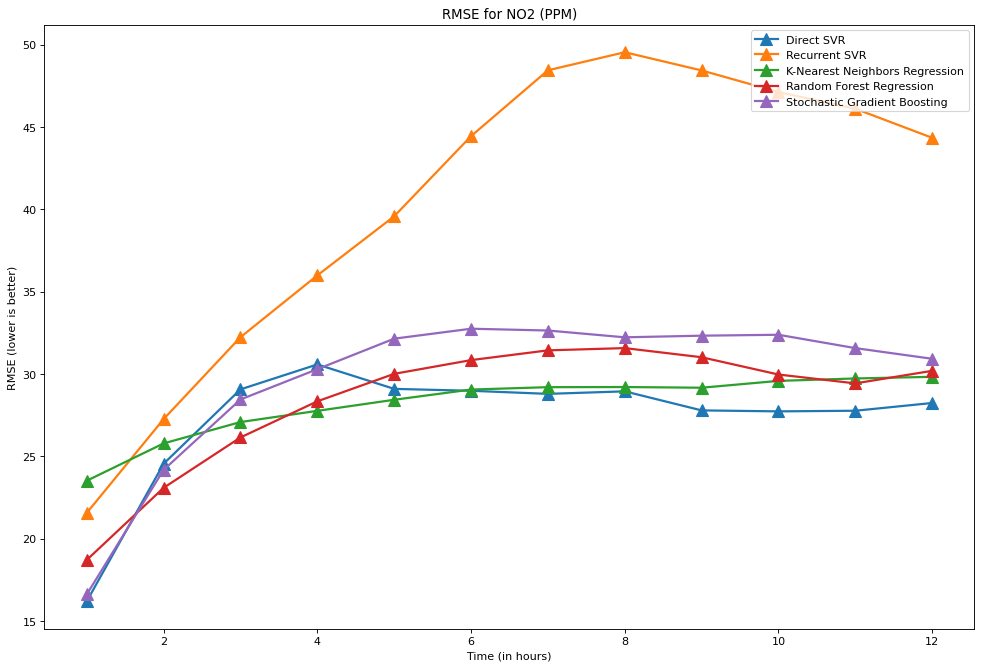

In [130]:
apc_name = apc_names[2]
plot_rmse(apc_name, excludes)

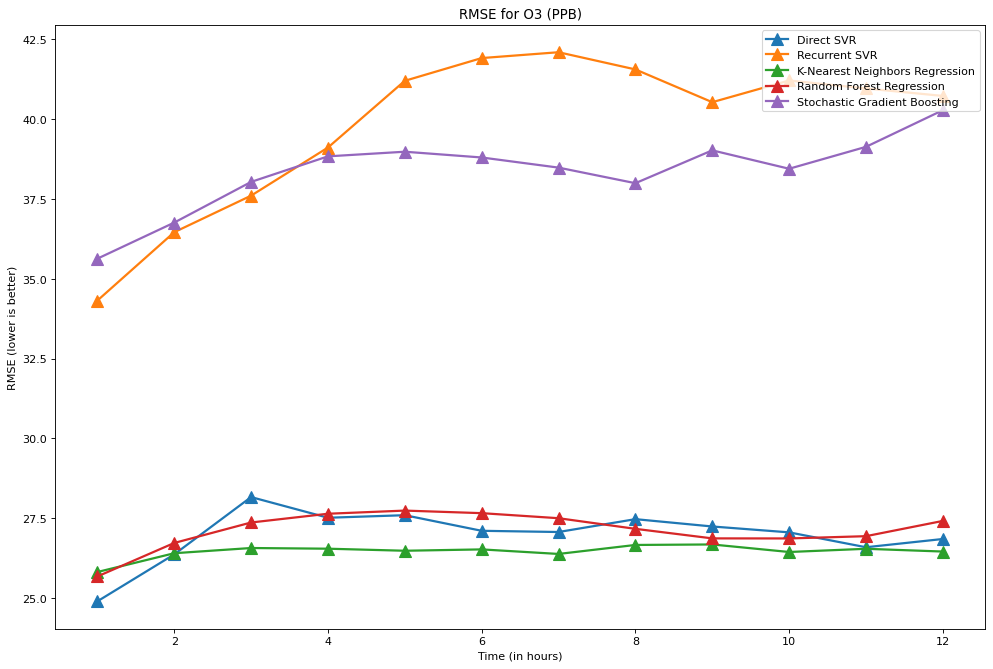

In [131]:
apc_name = apc_names[3]
plot_rmse(apc_name, excludes)

# Ensemble vs Recurrent vs Direct

In [132]:
apc_names = list(plcc_dict.keys())
exclude_cols = ['K-Nearest Neighbors Regression', 'Random Forest Regression', 
               'Stochastic Gradient Boosting']

## PLCC

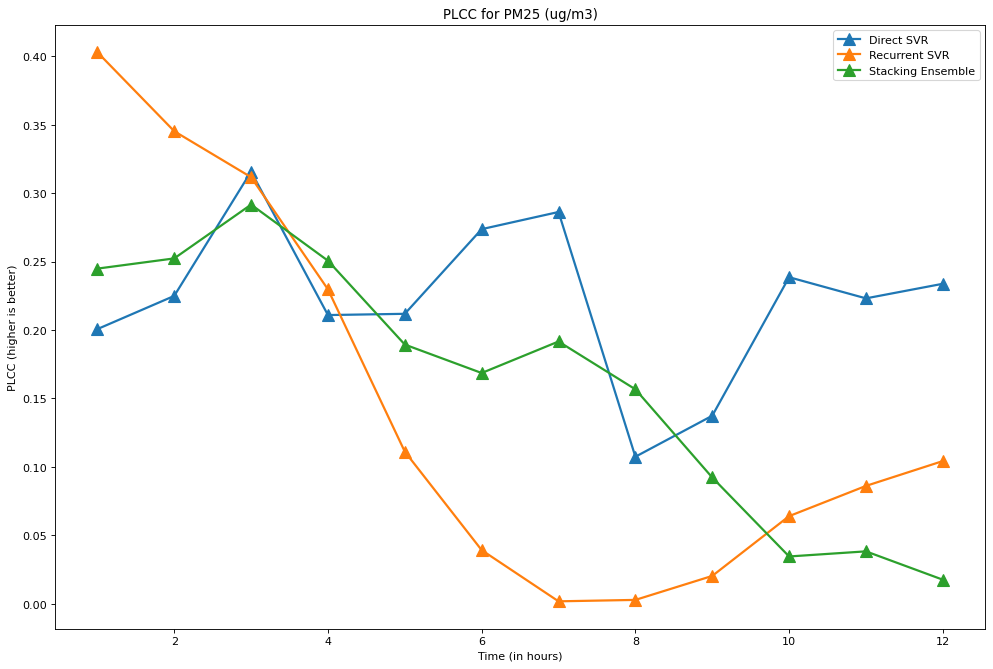

In [133]:
apc_name = apc_names[0]
plot_plcc(apc_name, exclude_cols)

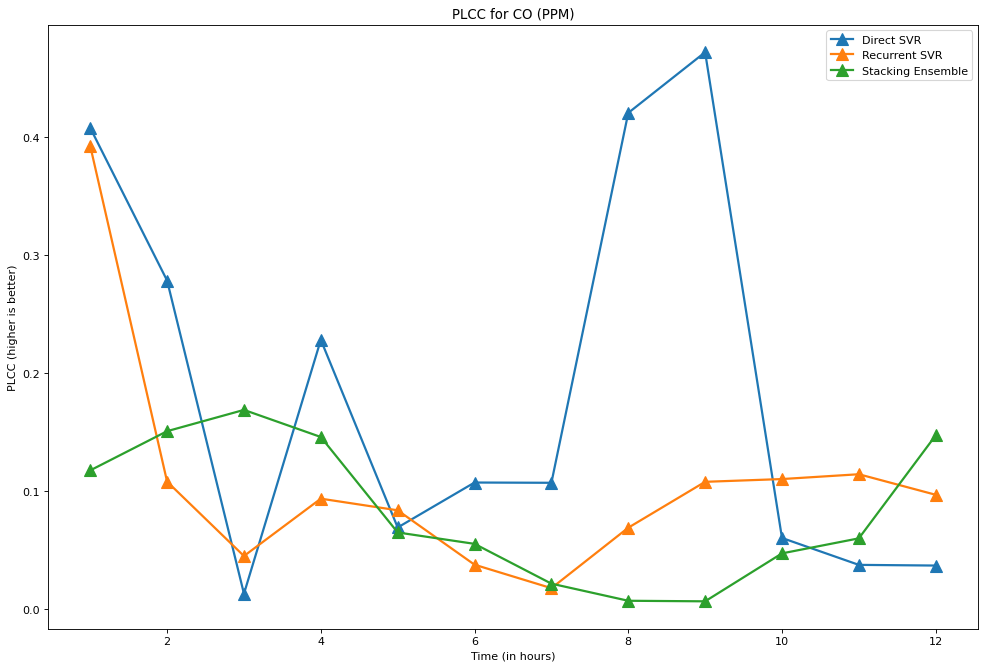

In [134]:
apc_name = apc_names[1]
plot_plcc(apc_name, exclude_cols)

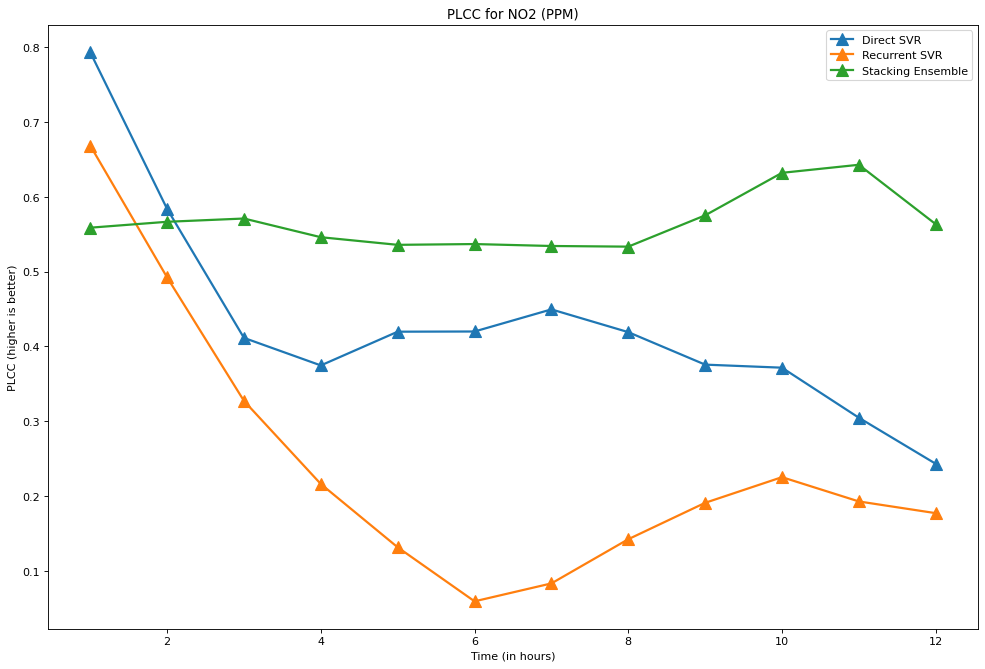

In [135]:
apc_name = apc_names[2]
plot_plcc(apc_name, exclude_cols)

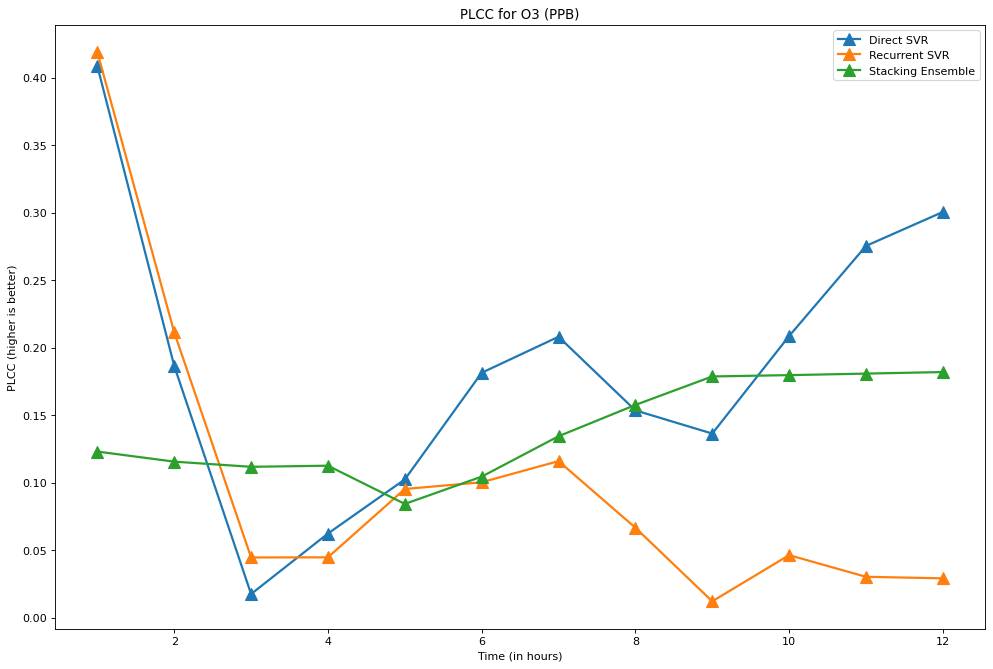

In [136]:
apc_name = apc_names[3]
plot_plcc(apc_name, exclude_cols)

## RMSE

In [137]:
apc_names = list(rmse_dict.keys())

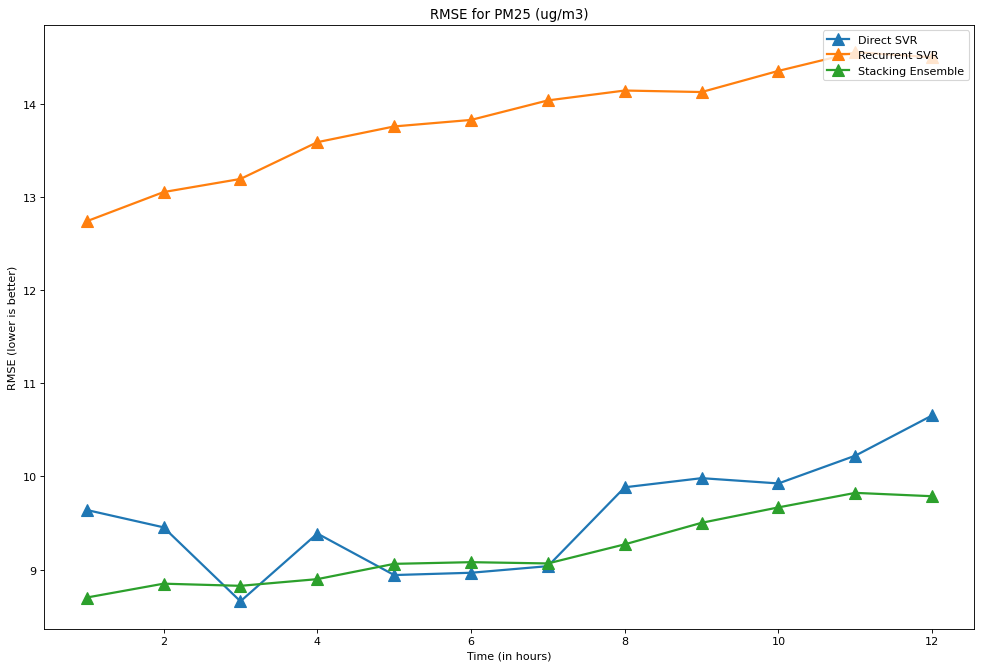

In [138]:
apc_name = apc_names[0]
plot_rmse(apc_name, exclude_cols)

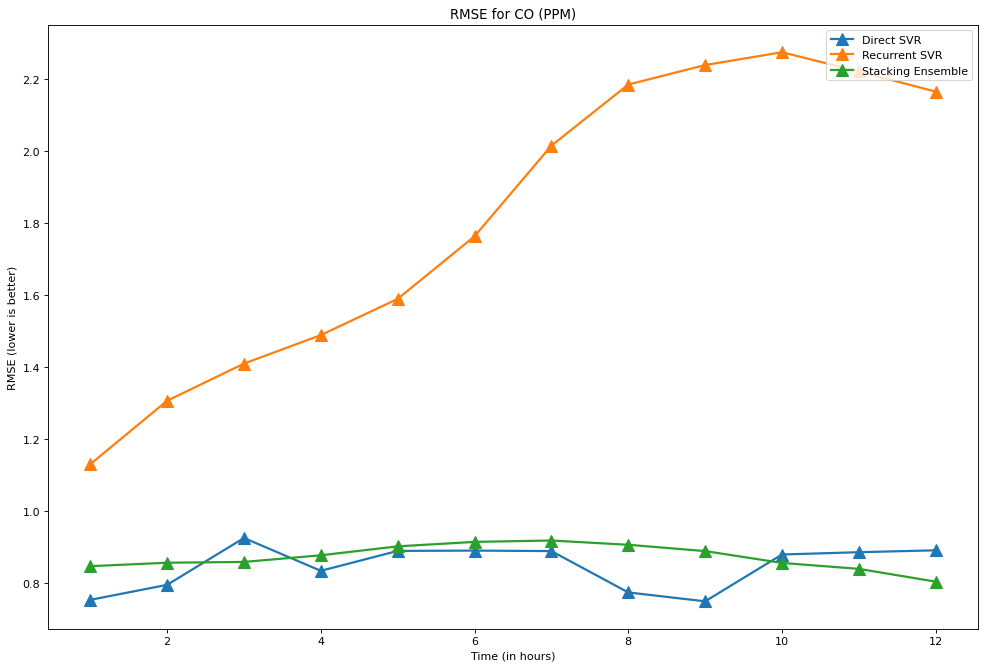

In [139]:
apc_name = apc_names[1]
plot_rmse(apc_name, exclude_cols)

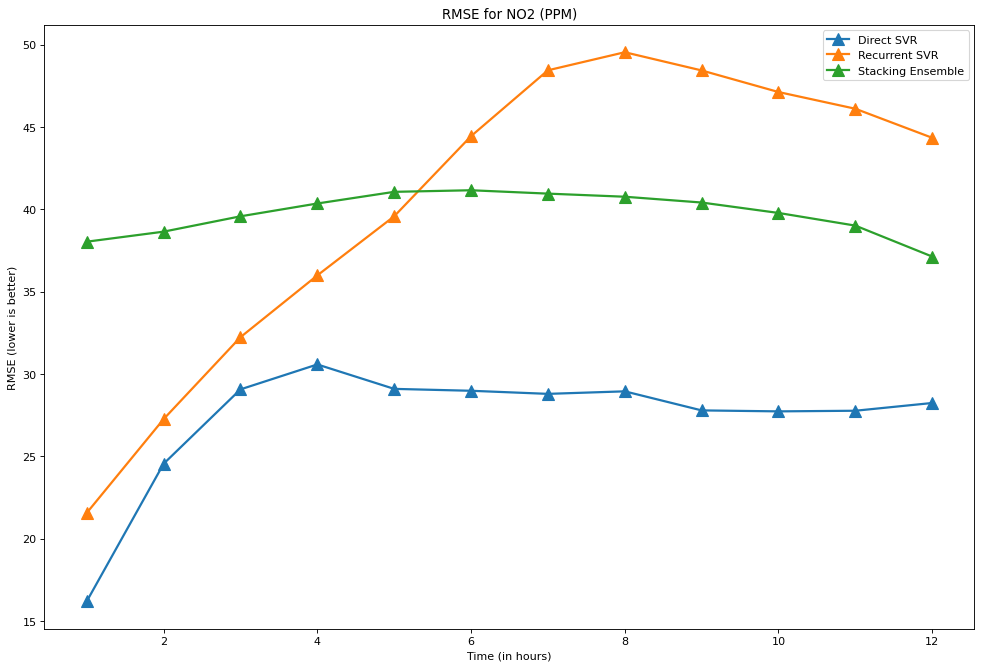

In [140]:
apc_name = apc_names[2]
plot_rmse(apc_name, exclude_cols)

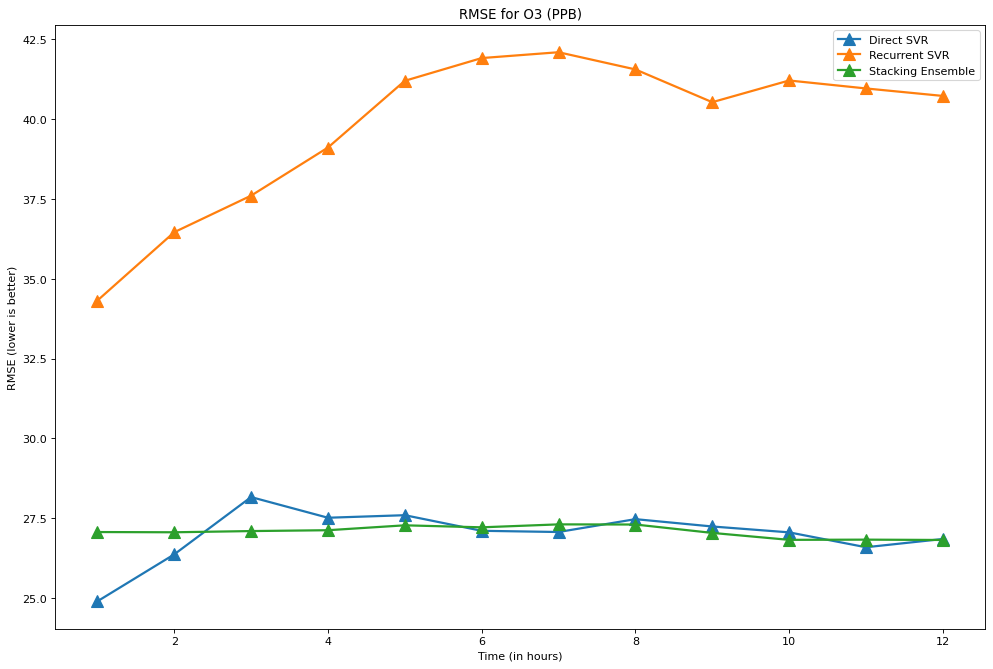

In [141]:
apc_name = apc_names[3]
plot_rmse(apc_name, exclude_cols)

# Recurrent vs Ensemble

In [142]:
apc_names = list(plcc_dict.keys())
exclude_cols = ['Direct SVR', 'K-Nearest Neighbors Regression', 'Random Forest Regression', 
                'Stochastic Gradient Boosting']

## PLCC

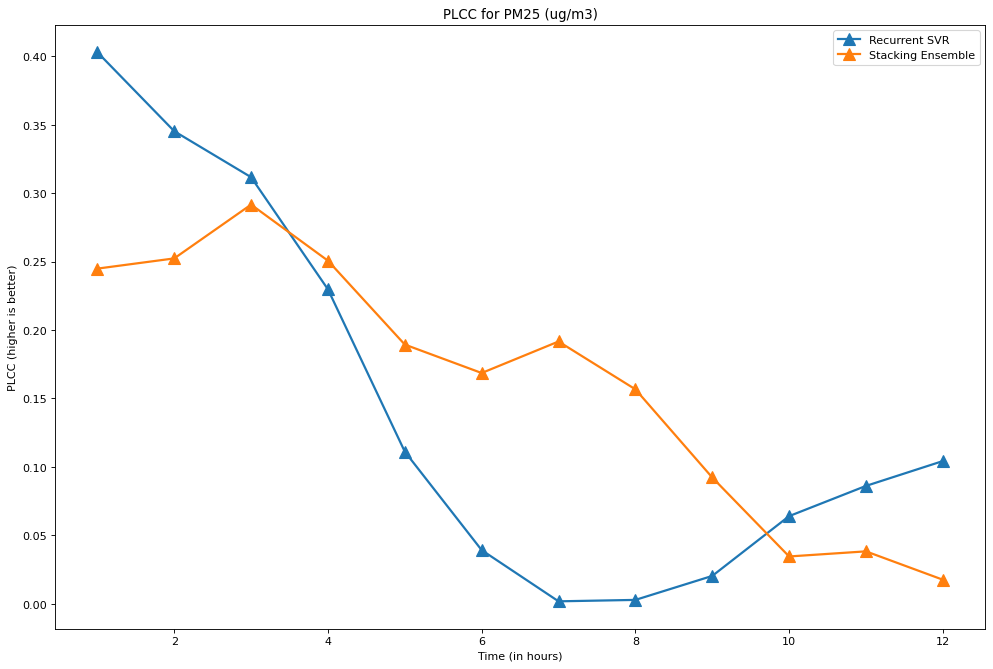

In [143]:
apc_name = apc_names[0]
plot_plcc(apc_name, exclude_cols)

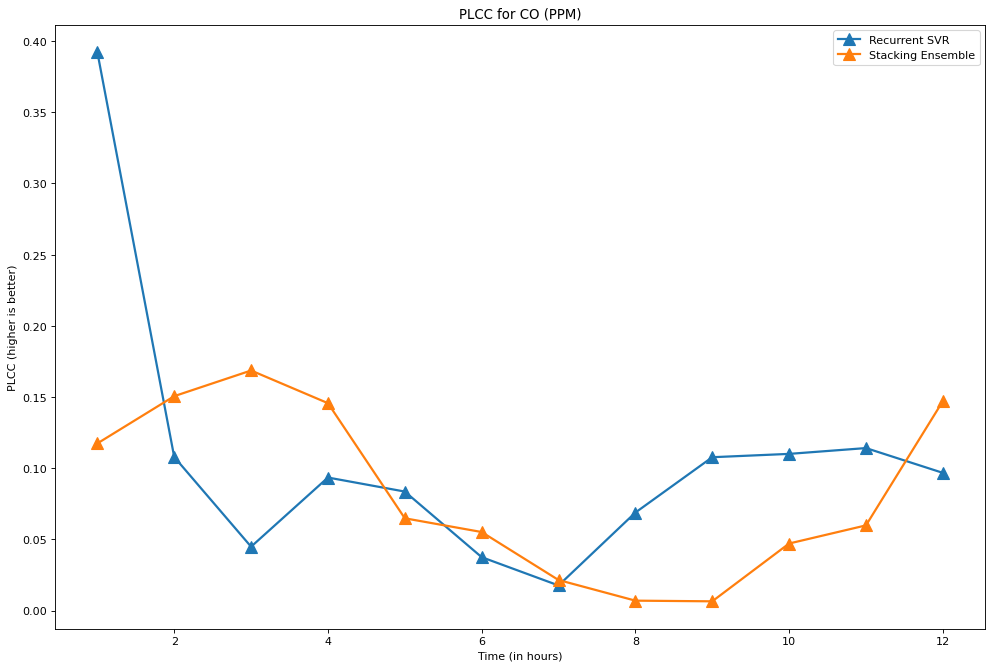

In [144]:
apc_name = apc_names[1]
plot_plcc(apc_name, exclude_cols)

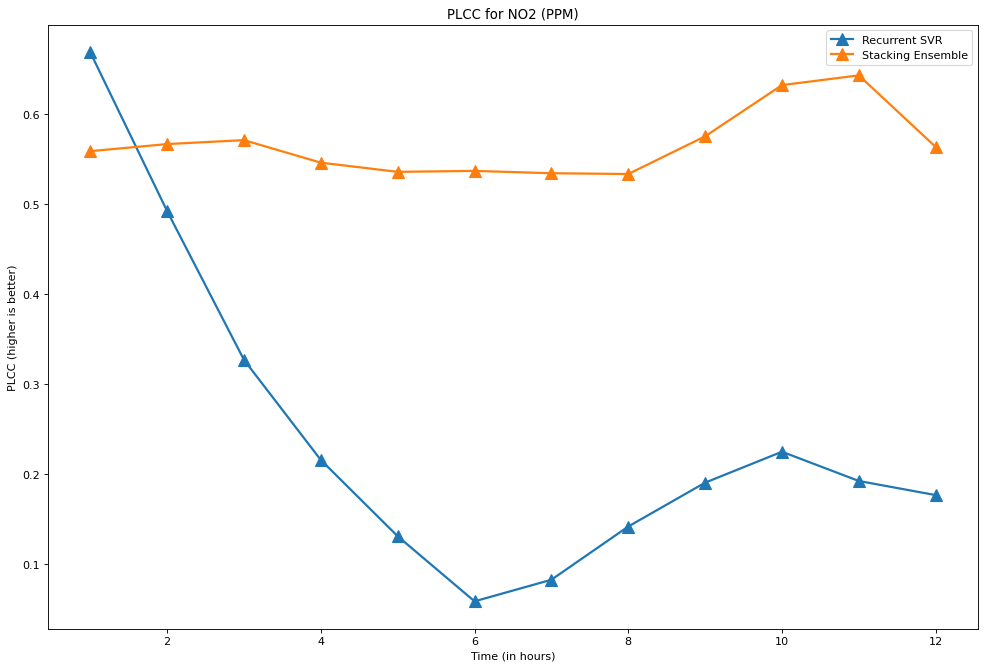

In [145]:
apc_name = apc_names[2]
plot_plcc(apc_name, exclude_cols)

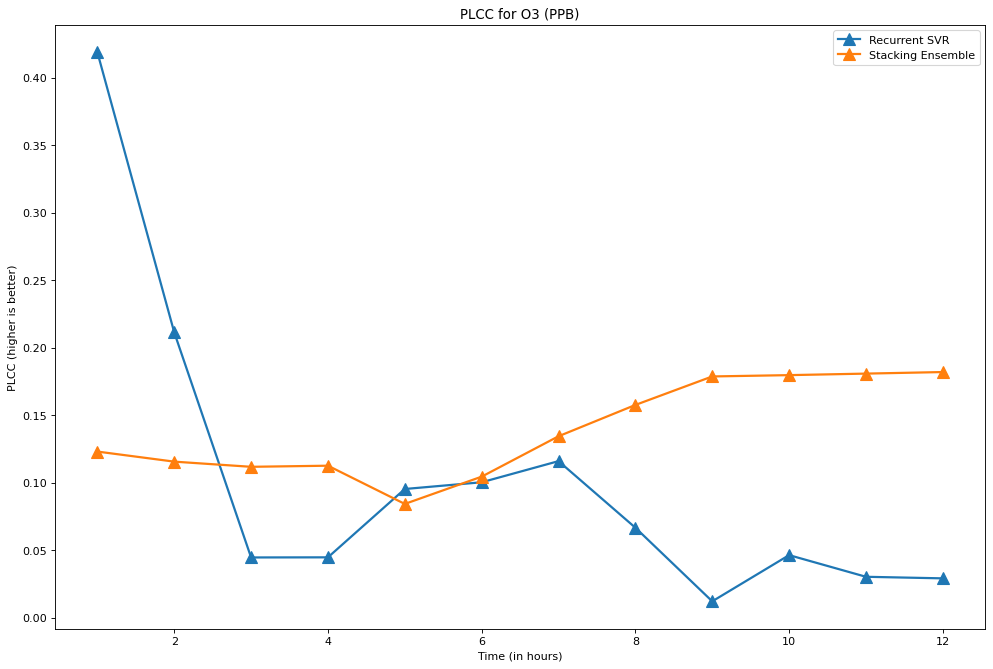

In [146]:
apc_name = apc_names[3]
plot_plcc(apc_name, exclude_cols)

## RMSE

In [147]:
apc_names = list(rmse_dict.keys())

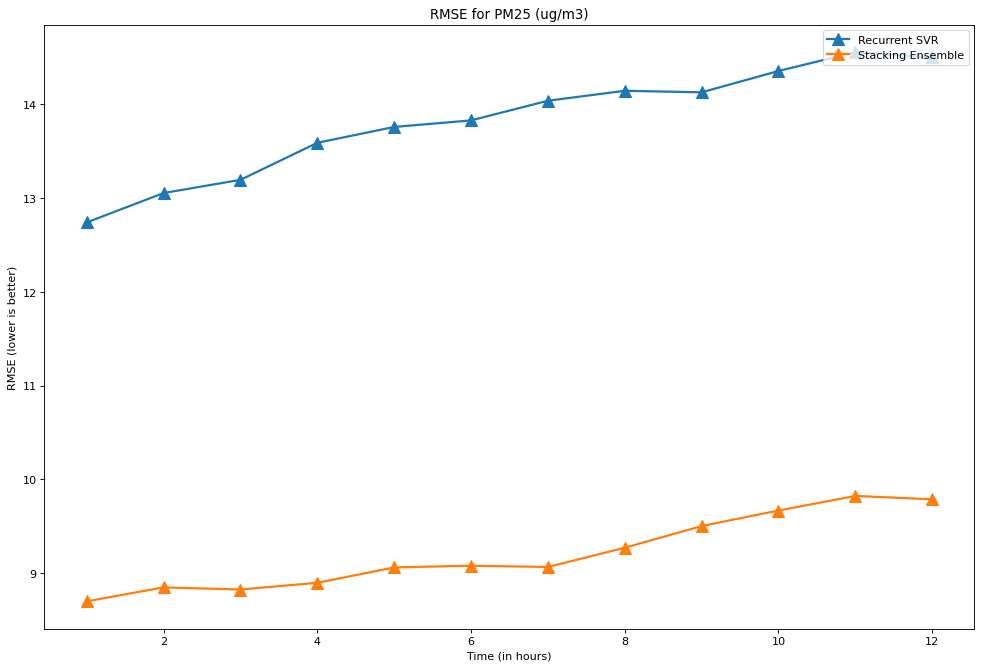

In [148]:
apc_name = apc_names[0]
plot_rmse(apc_name, exclude_cols)

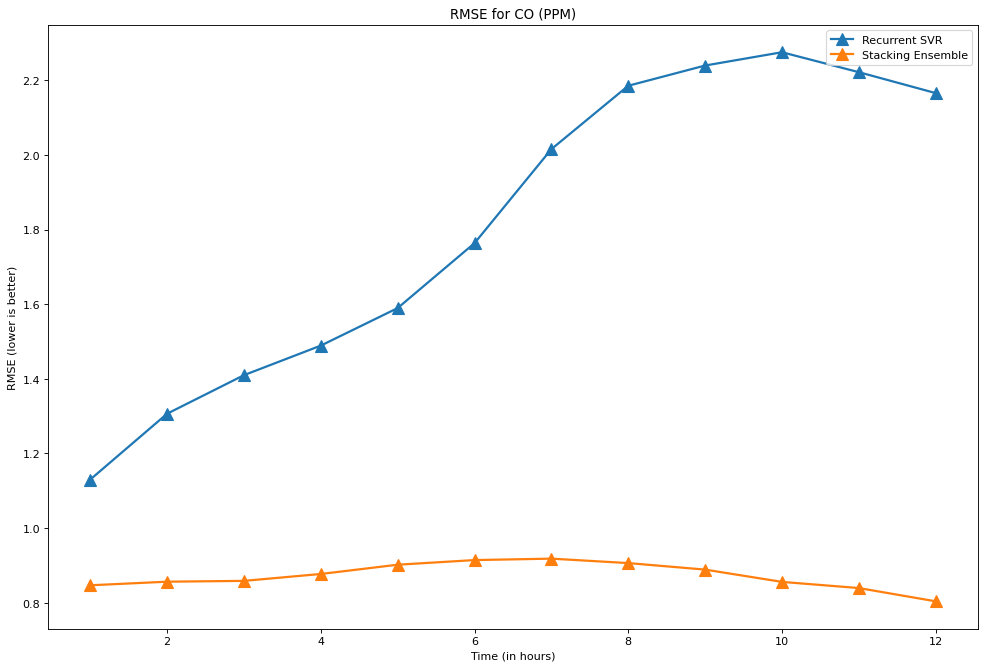

In [149]:
apc_name = apc_names[1]
plot_rmse(apc_name, exclude_cols)

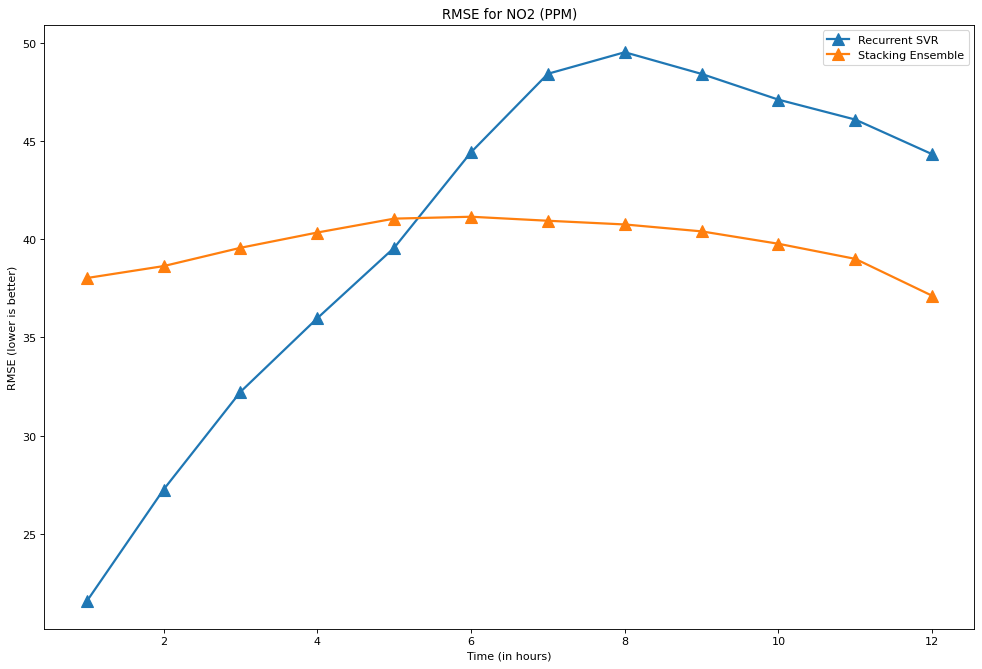

In [150]:
apc_name = apc_names[2]
plot_rmse(apc_name, exclude_cols)

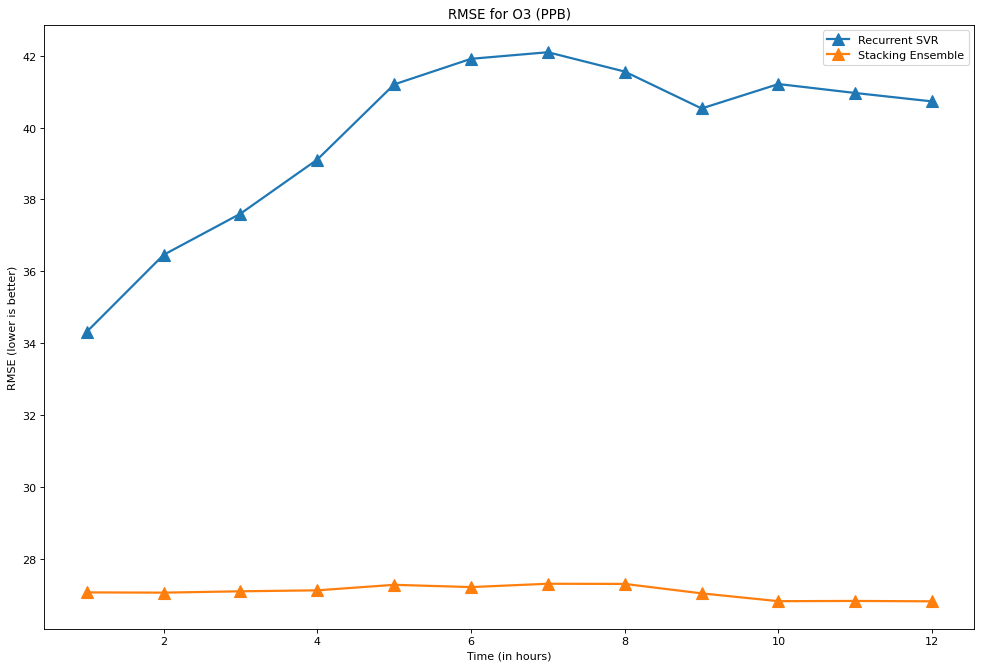

In [151]:
apc_name = apc_names[3]
plot_rmse(apc_name, exclude_cols)

# Plot everything

## PLCC

In [152]:
apc_names = list(plcc_dict.keys())

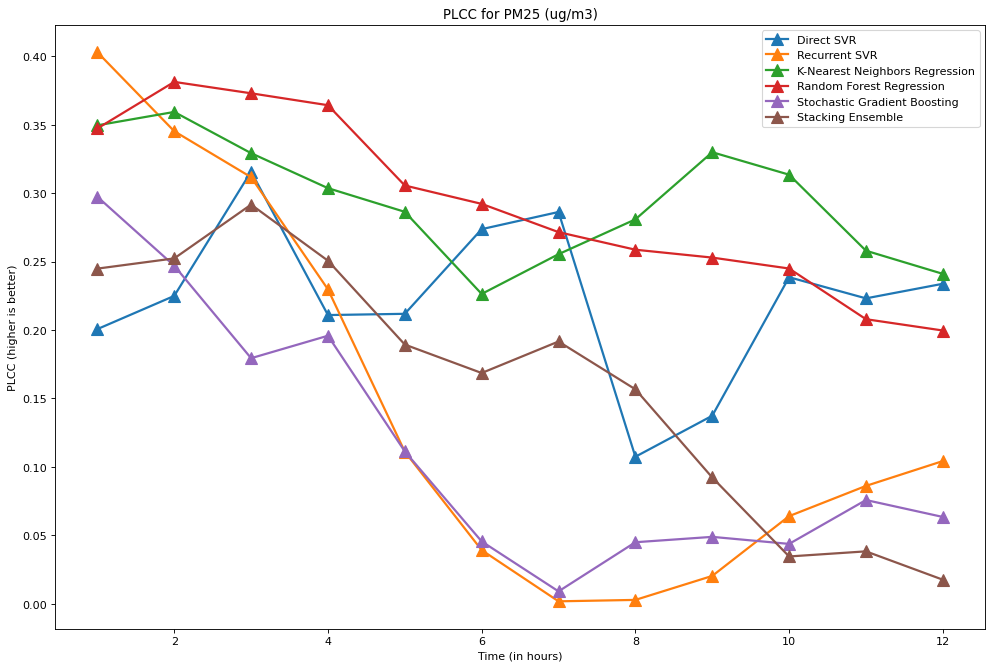

In [153]:
apc_name = apc_names[0]
plot_plcc(apc_name)

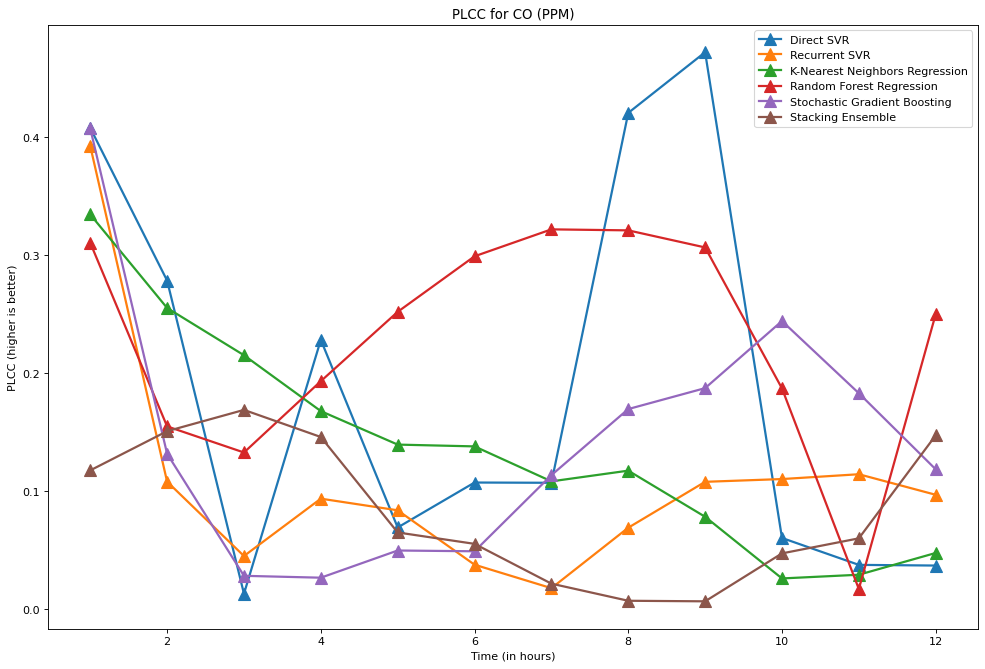

In [154]:
apc_name = apc_names[1]
plot_plcc(apc_name)

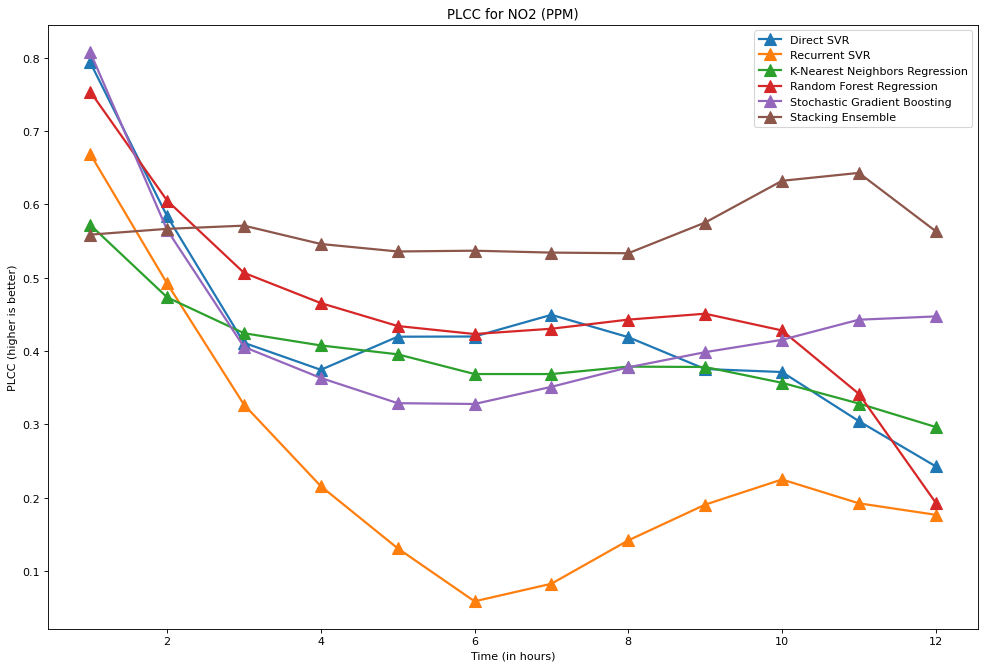

In [155]:
apc_name = apc_names[2]
plot_plcc(apc_name)

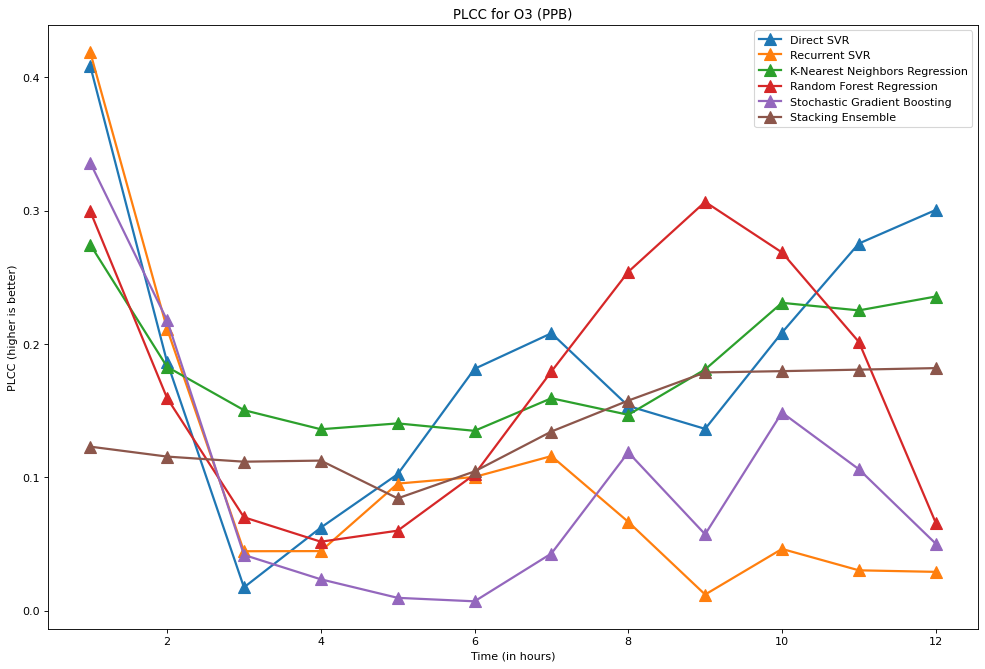

In [156]:
apc_name = apc_names[3]
plot_plcc(apc_name)

## RMSE

In [157]:
apc_names = list(rmse_dict.keys())

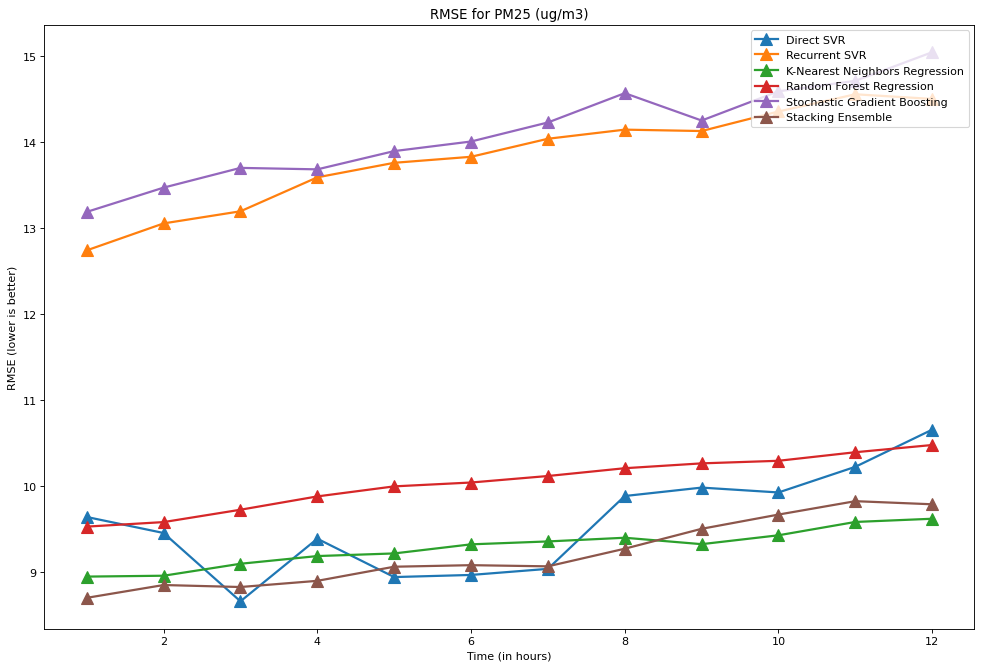

In [158]:
apc_name = apc_names[0]
plot_rmse(apc_name)

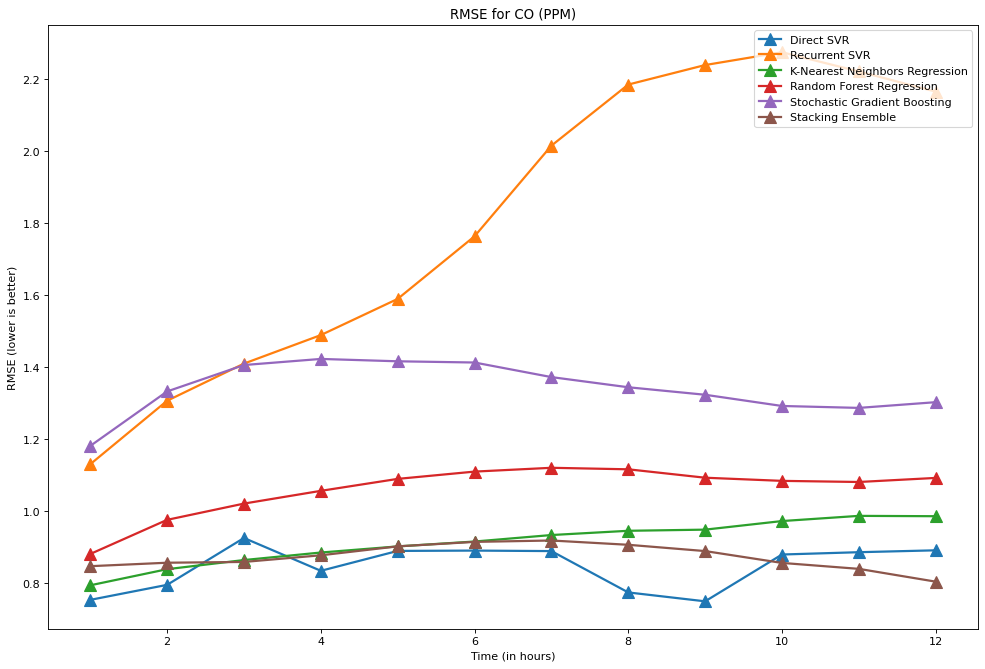

In [159]:
apc_name = apc_names[1]
plot_rmse(apc_name)

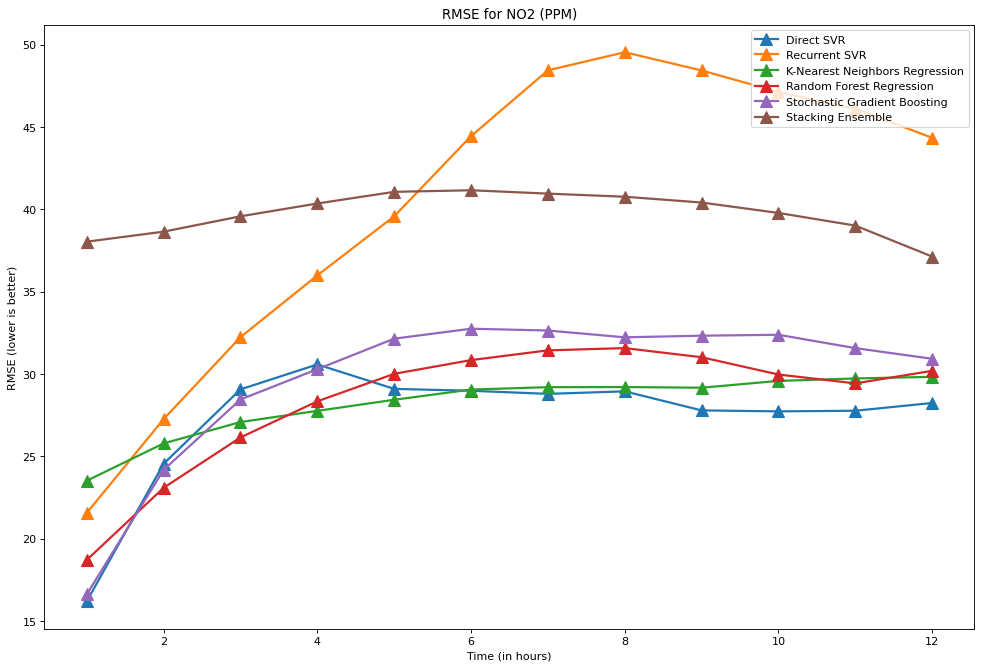

In [160]:
apc_name = apc_names[2]
plot_rmse(apc_name)

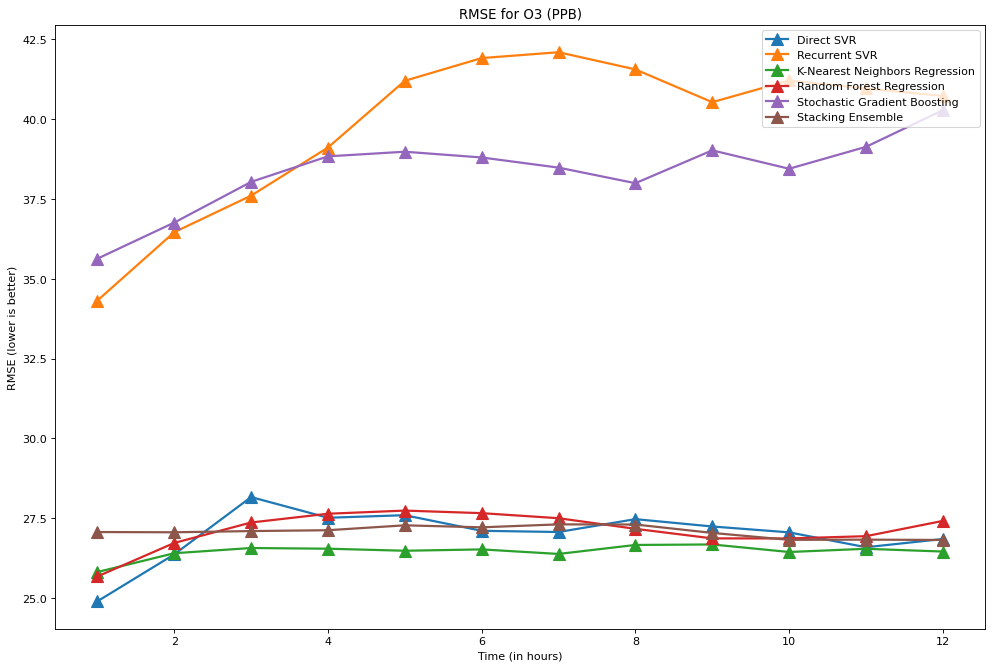

In [161]:
apc_name = apc_names[3]
plot_rmse(apc_name)